TIPO DE CAMPOS E VALORES

In [9]:
import pandas as pd


df = pd.read_csv('PRESIDENT_precinct_general.csv')

unique_modes = df['mode'].unique()
mode_dtype = df['mode'].dtype

unique_candidates = df['candidate'].unique()
candidates_dtype = df['candidate'].dtype

unique_party_detailed = df['party_detailed'].unique()
party_detailed_dtype = df['party_detailed'].dtype

unique_party_simplified = df['party_simplified'].unique()
party_simplified_dtype = df['party_simplified'].dtype


print(unique_modes)
print(mode_dtype)

print(unique_candidates)
print(candidates_dtype)

print(unique_party_detailed)
print(party_detailed_dtype)

print(unique_party_simplified)
print(party_simplified_dtype)

with open('PRESIDENT_precinct_general_analysis.txt', 'w') as f:
    f.write("Valores distintos 'mode':\n")
    f.write(", ".join(map(str, unique_modes)) + "\n\n")
    f.write("Tipo 'mode':\n")
    f.write(str(mode_dtype) + "\n")
    f.write("Valores distintos 'candidates':\n")
    f.write(", ".join(map(str, unique_candidates)) + "\n\n")
    f.write("Tipo 'candidates':\n")
    f.write(str(candidates_dtype) + "\n")
    f.write("Valores distintos 'party_detailed':\n")
    f.write(", ".join(map(str, unique_party_detailed)) + "\n\n")
    f.write("Tipo 'party_detailed':\n")
    f.write(str(party_detailed_dtype) + "\n")
    f.write("Valores distintos 'party_simplified':\n")
    f.write(", ".join(map(str, unique_party_simplified)) + "\n\n")
    f.write("Tipo 'party_simplified':\n")
    f.write(str(party_simplified_dtype) + "\n")




C:\Users\Raissa\AppData\Local\Temp\ipykernel_16096\414452757.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PRESIDENT_precinct_general.csv')


['ABSENTEE' 'NOT ABSENTEE' 'TOTAL' 'ELECTION DAY' 'EARLY' 'PRES'
 'EARLY VOTING' 'PROVISIONAL' '2ND ABSENTEE' 'MAIL' 'UOCAVA'
 'ABSENTEE BY MAIL' 'ONE STOP' 'HAND COUNTED' 'MAIL BALLOTS'
 'IN PERSON ABSENTEE' 'FAILSAFE' 'FAILSAFE PROVISIONAL' 'ADVANCED VOTING']
object
['ROQUE DE LA FUENTE GUERRA' 'JOSEPH R BIDEN' 'HOWIE HAWKINS'
 'JO JORGENSEN' 'GLORIA LA RIVA' 'DONALD J TRUMP' 'KASEY WELLS'
 'DEBORAH ROUSE' 'ABRAM LOEB' 'RANDALL F' 'SHAWN HOWARD' 'VALERIE MCCRAY'
 'JAMES L JOHNSON JR' 'JOE SCHRINER' 'MITCHELL WILLIAMS' 'BRIAN CARROLL'
 'CHRISTOPHER STRIED' 'WRITEIN' 'ALYSON KENNEDY' 'BILL HAMMONS'
 'BROCK PIERCE' 'DON BLANKENSHIP' 'JADE SIMMONS' 'KANYE WEST'
 'PRESIDENT BODDIE' 'TOM HOEFLING' 'SHARON WALLACE' 'ALL OTHERS' 'BLANKS'
 'ALBERT RALEY' 'BARBARA BELLAR' 'BENJAMIN SCHWALB' 'DENNIS ANDREW BALL'
 'EDWARD SHLIKAS' 'JEROME M SEGAL' 'JOHNSON LEE' 'MARK CHARLES'
 'MARY RUTH CARO SIMMONS' 'PETER W SHERRILL' 'PHIL COLLINS'
 'RANDALL FOLTYNIEWICZ' 'ROCQUE "ROCKY" DE LA FUENTE' 'RYAN E

Votos por candidatos (País)

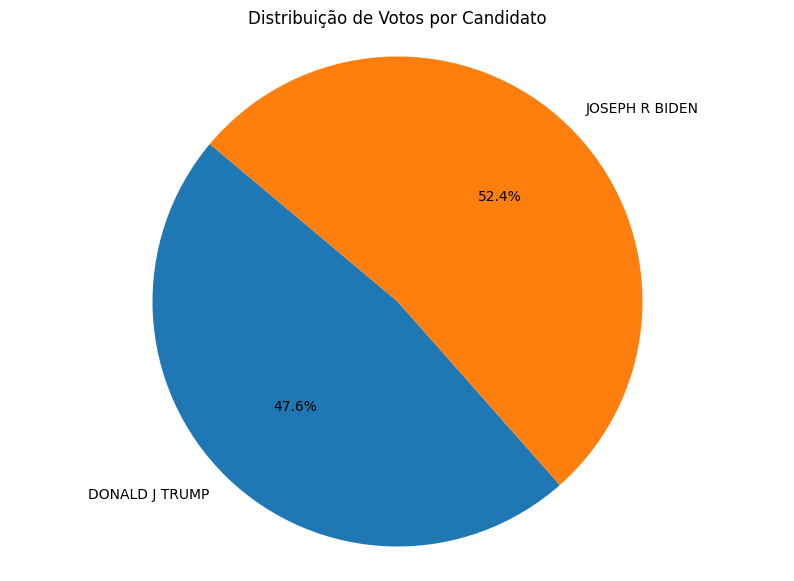

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('votes_trump_biden.csv')


votes_by_candidate = df.groupby('candidate')['votes'].sum()
# votes_by_candidate = votes_by_candidate[votes_by_candidate > 1]

# print(votes_by_candidate)
plt.figure(figsize=(10, 7))
plt.pie(votes_by_candidate, labels=votes_by_candidate.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Votos por Candidato')
plt.axis('equal') 

#plt.savefig('votes_by_candidate_pie_chart.png')


plt.show()


Votos por candidato (state)

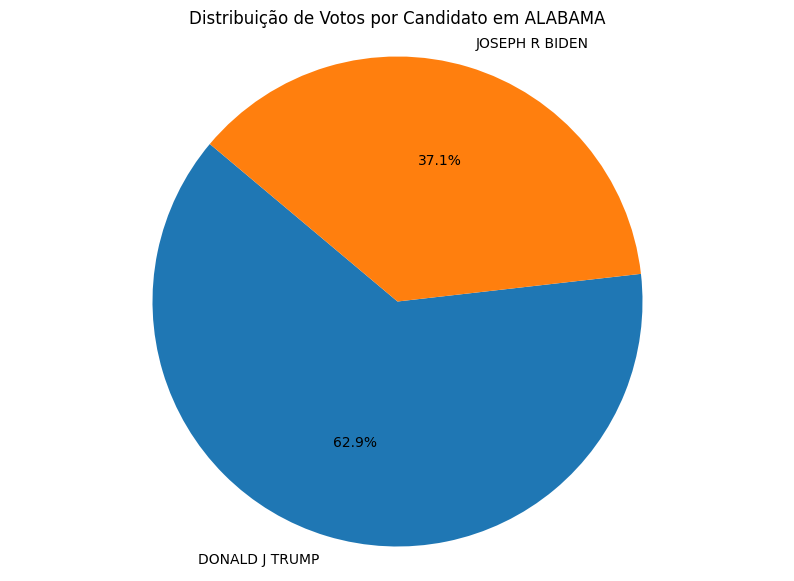

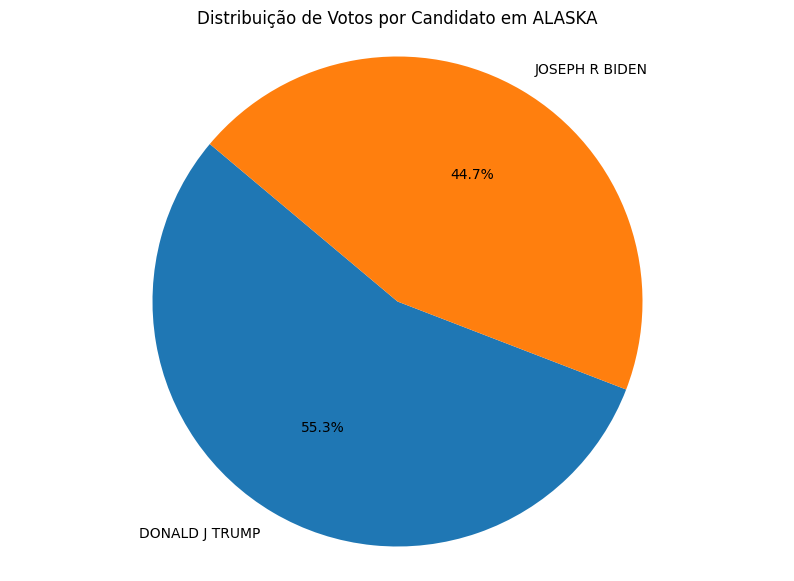

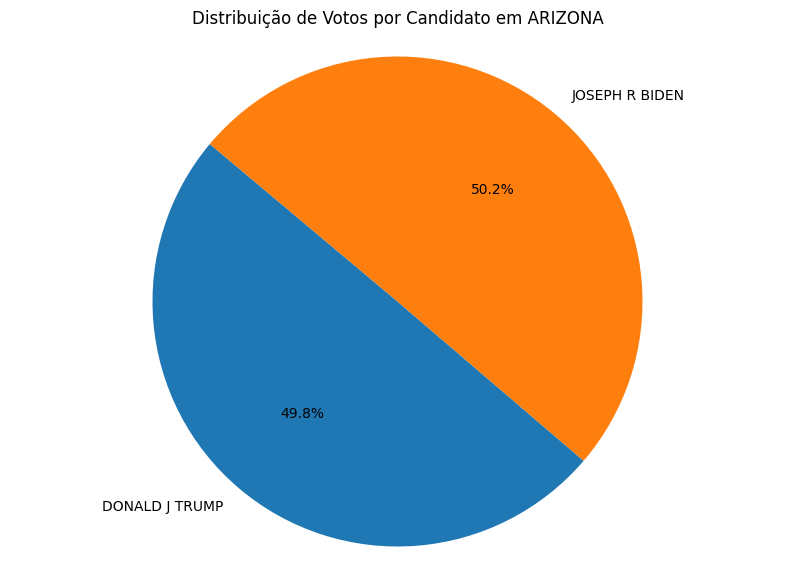

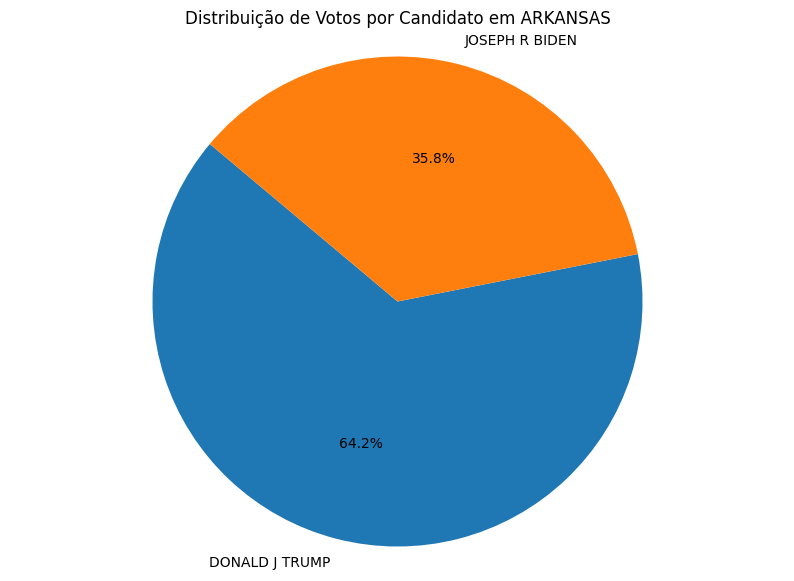

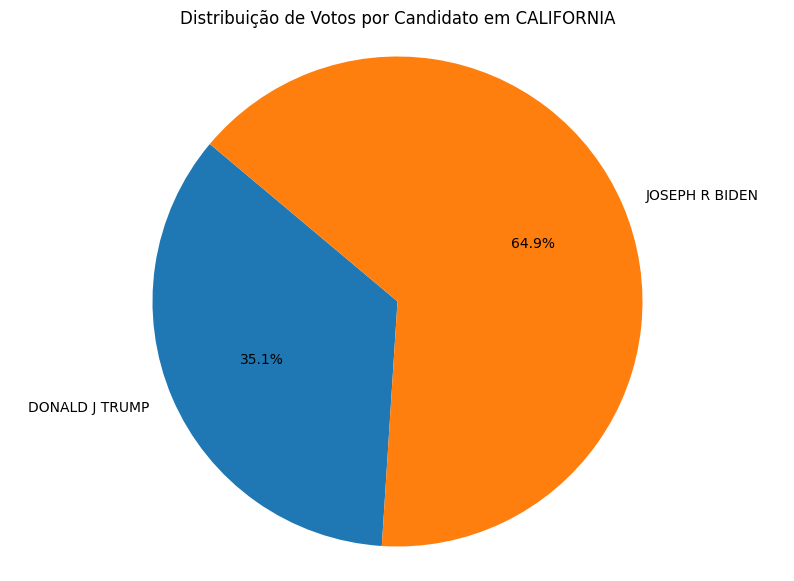

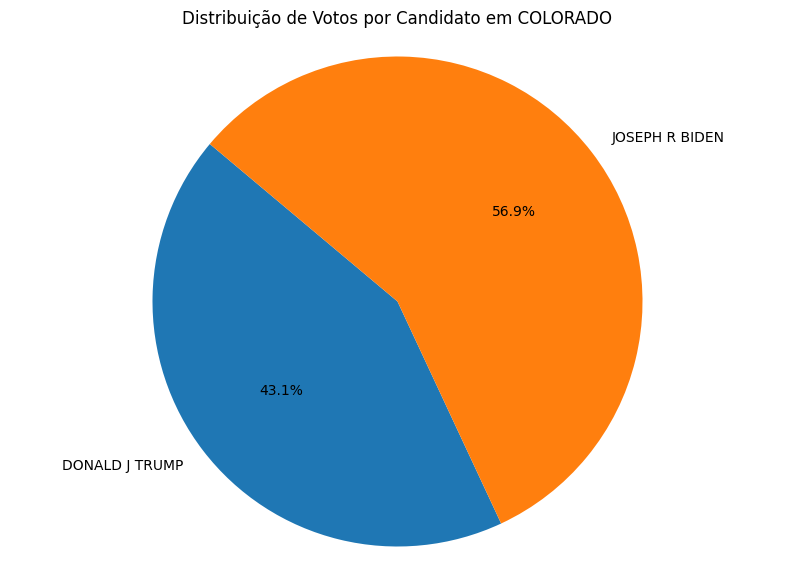

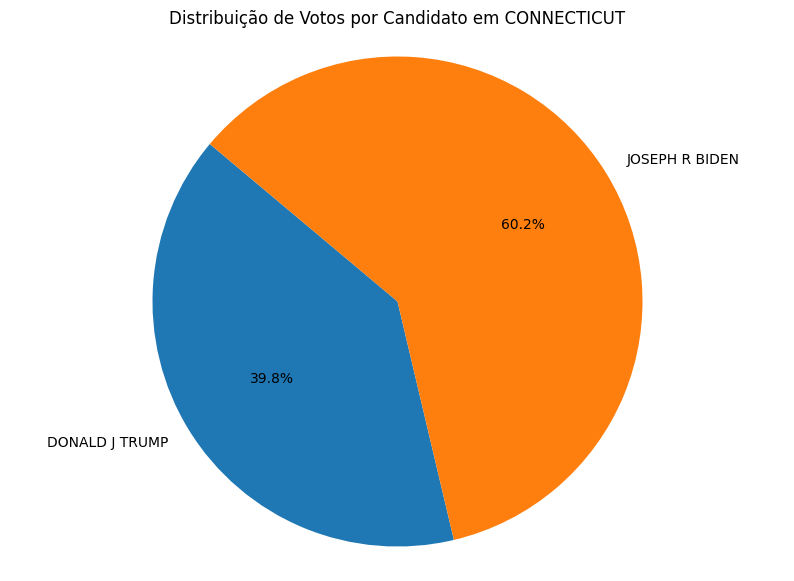

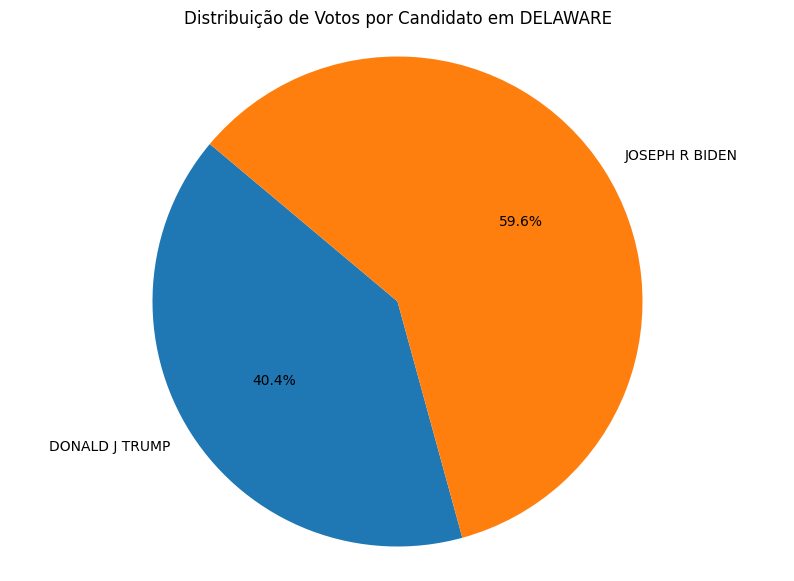

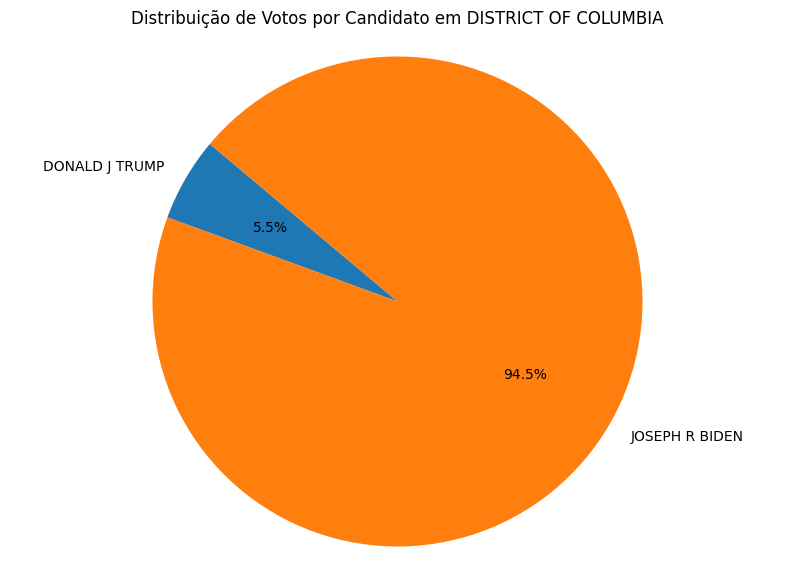

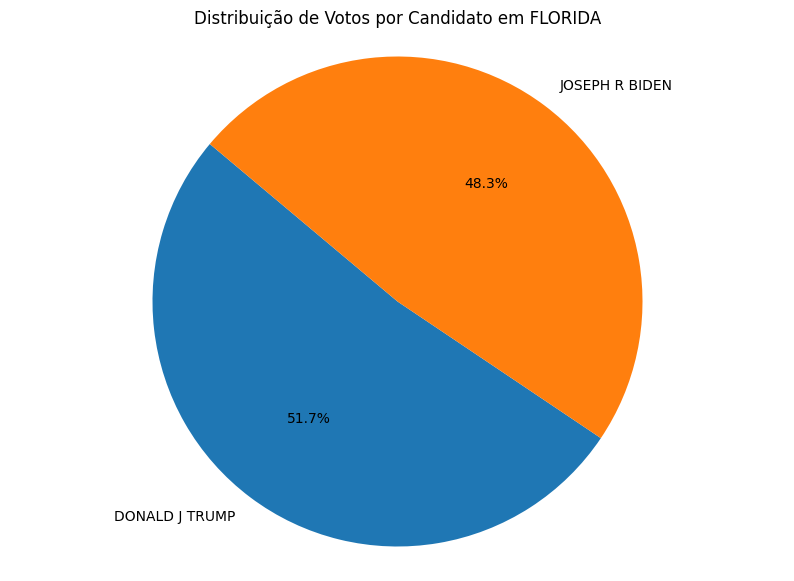

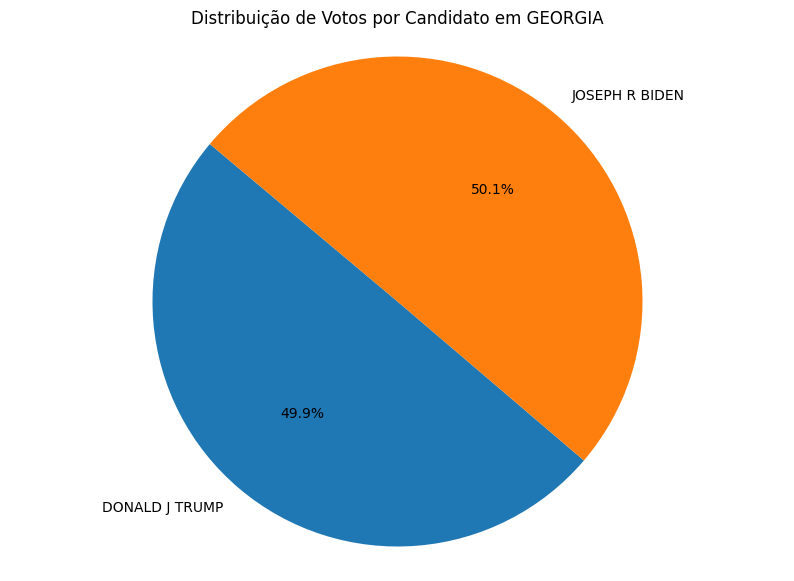

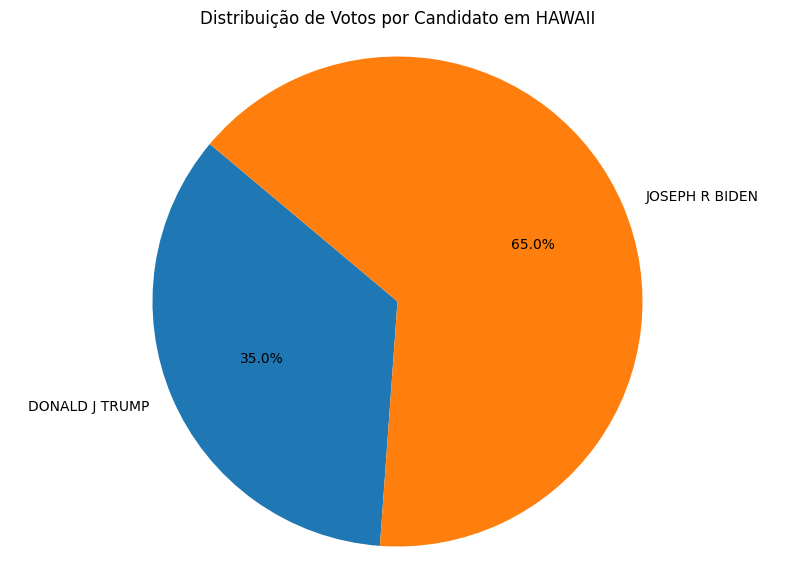

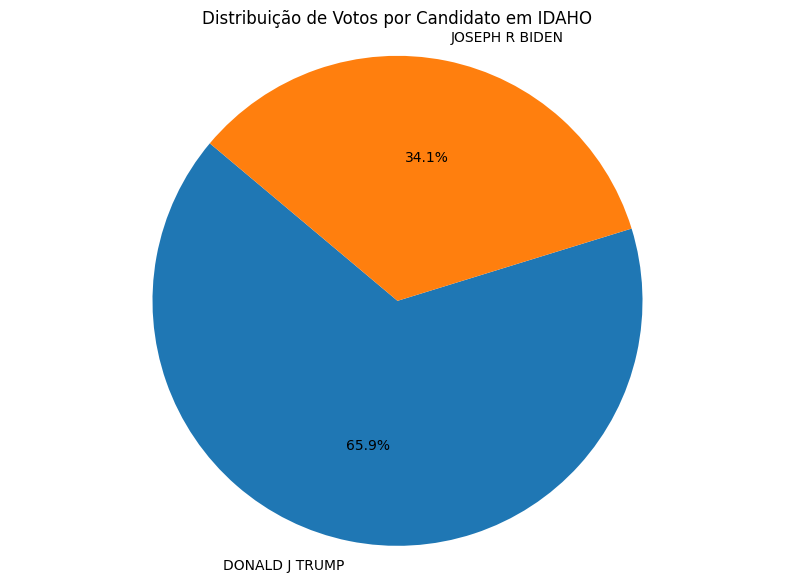

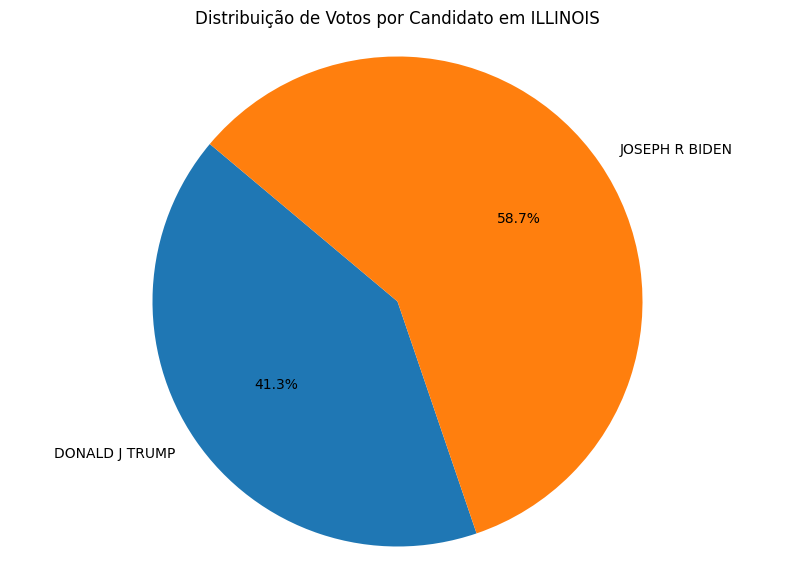

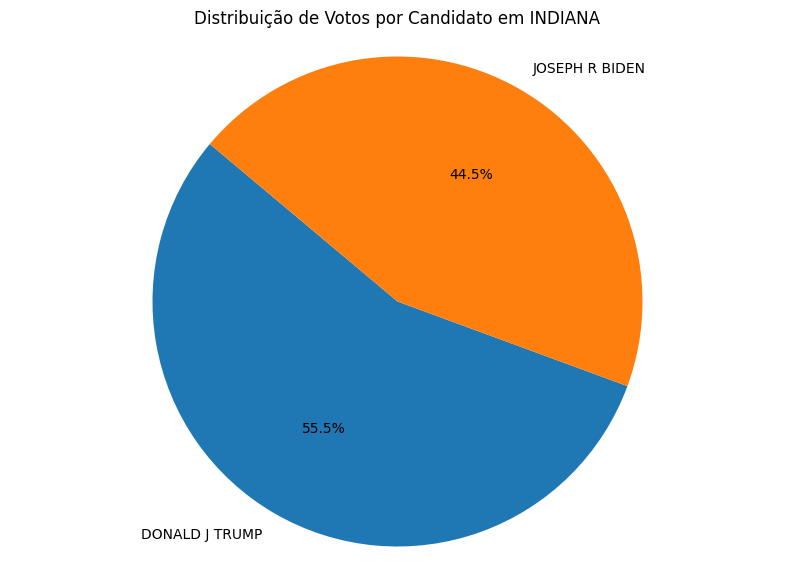

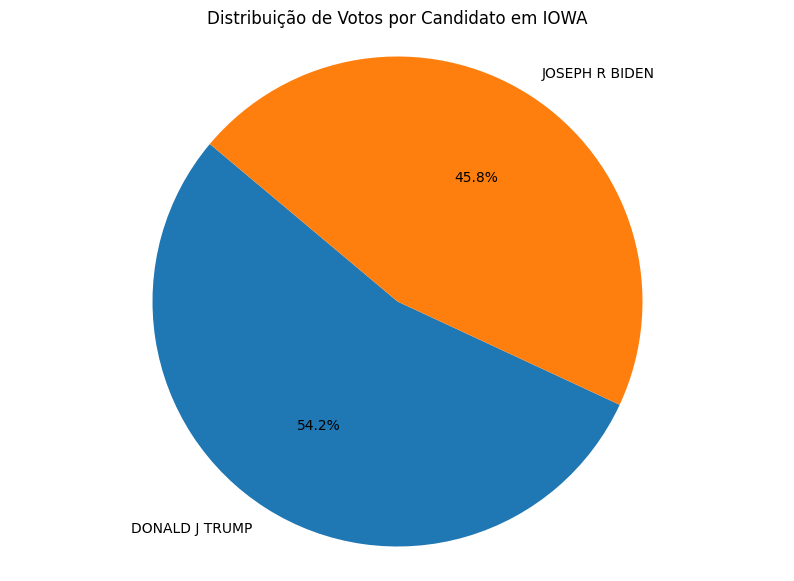

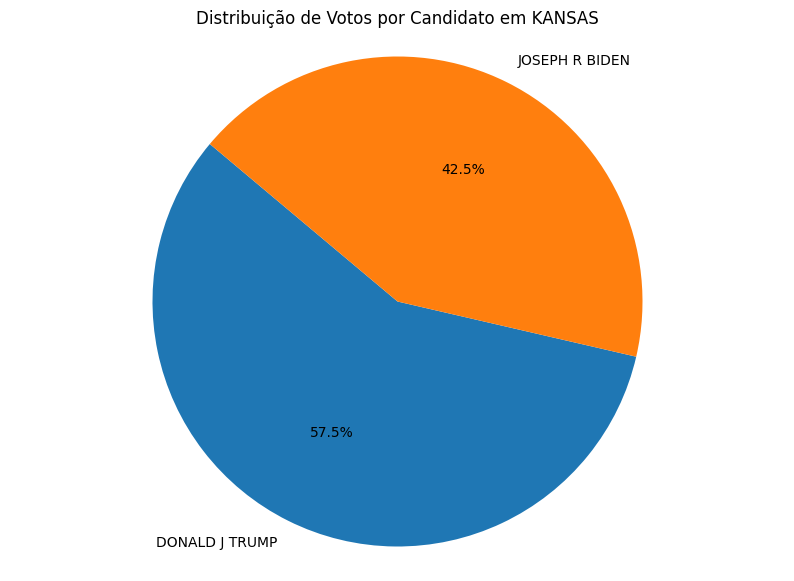

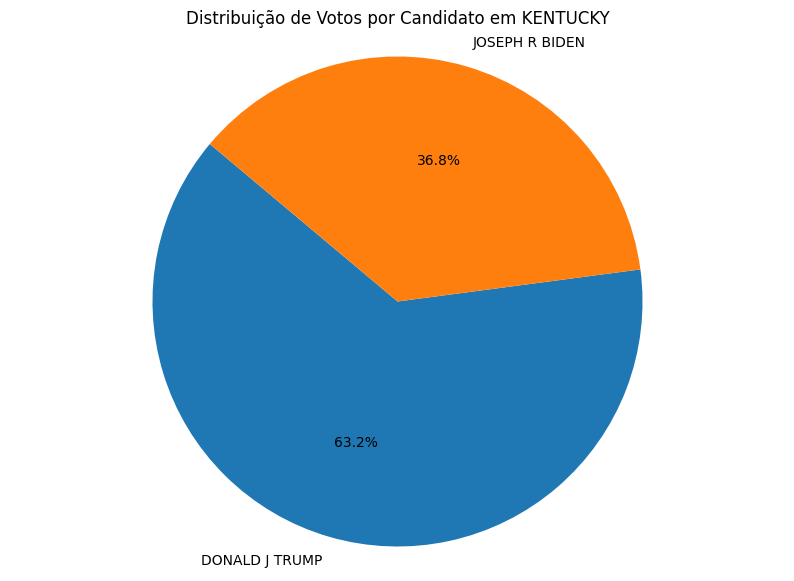

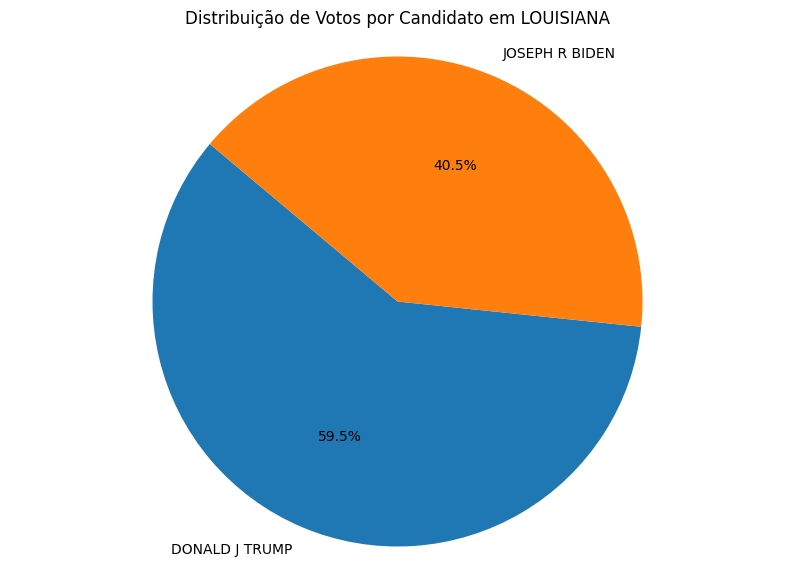

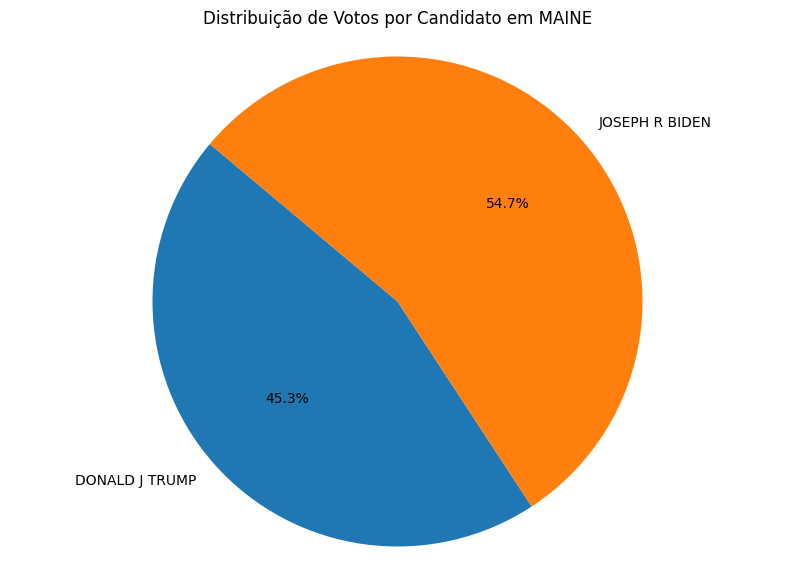

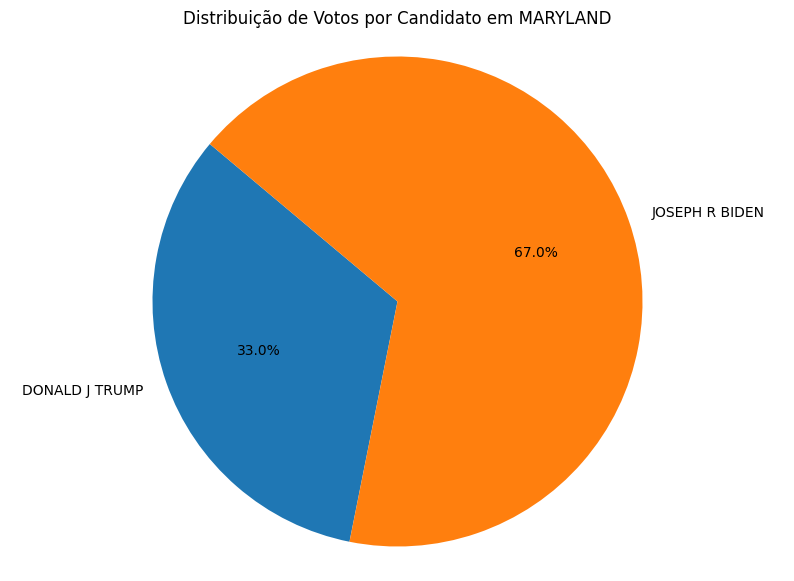

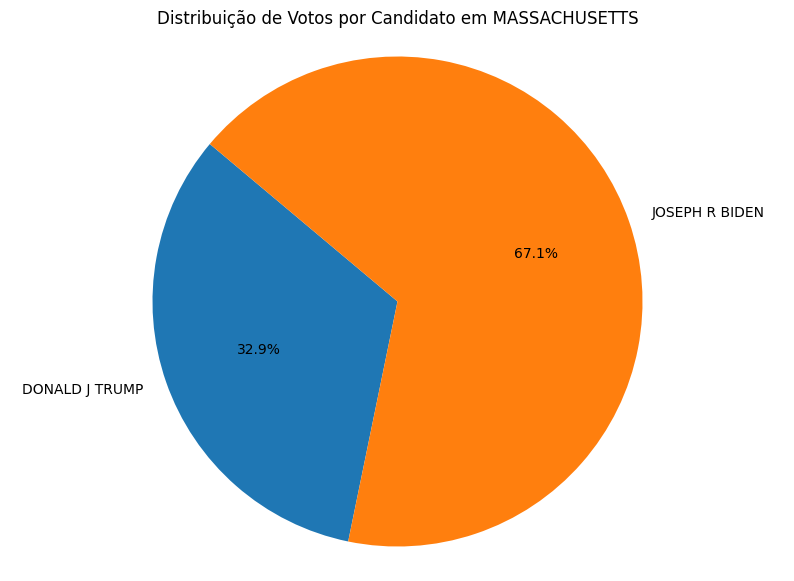

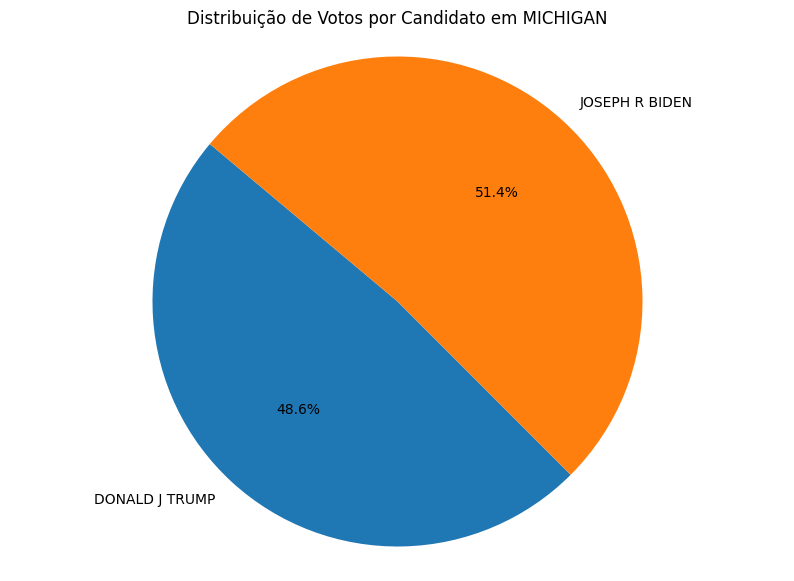

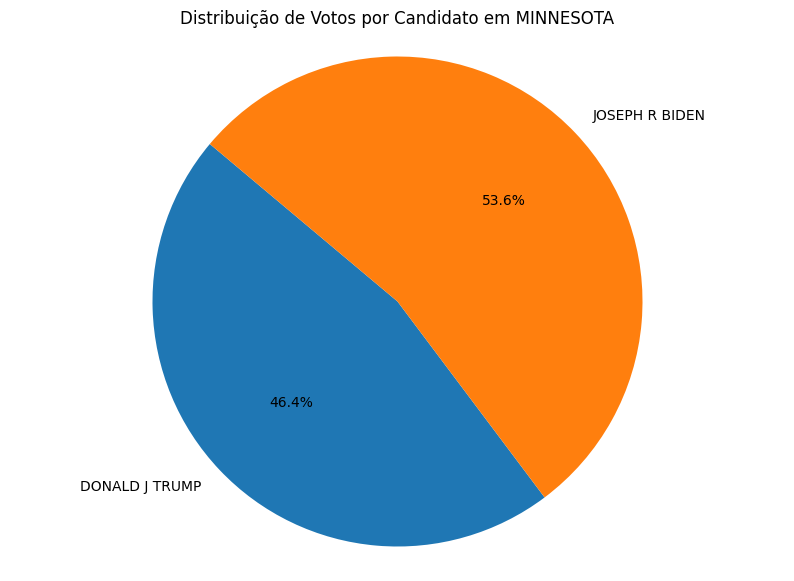

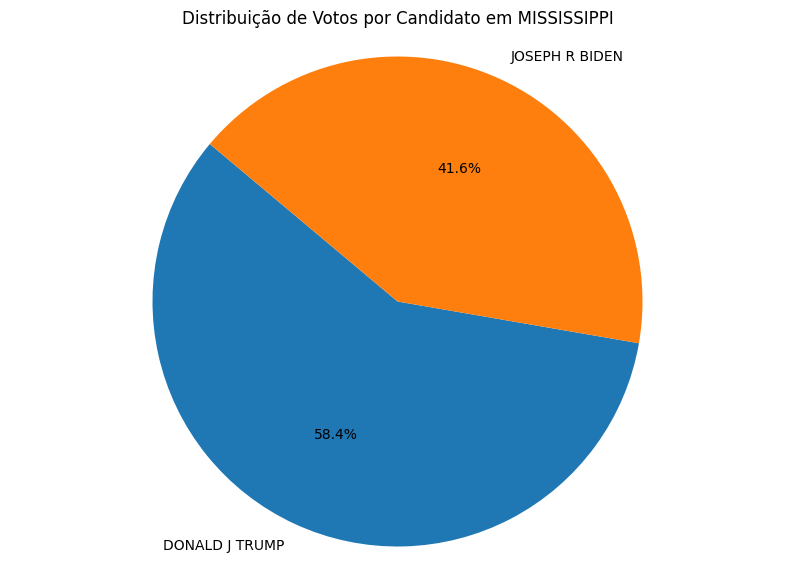

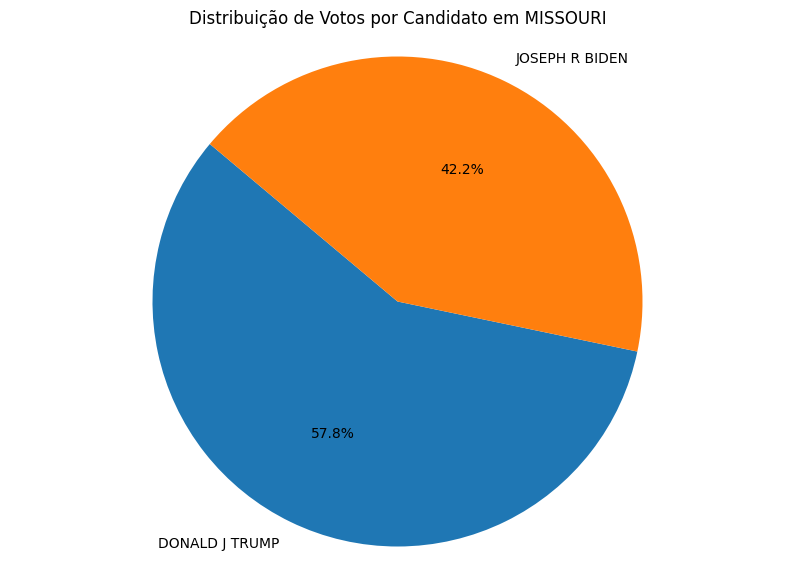

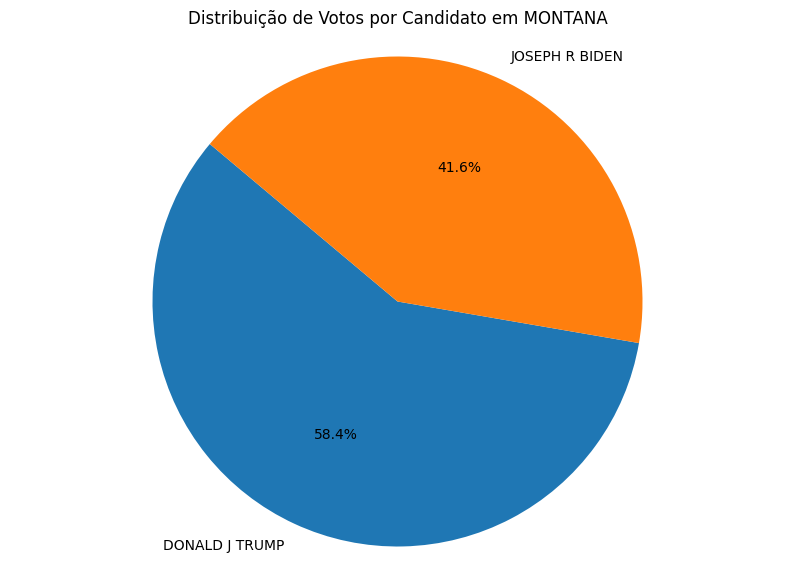

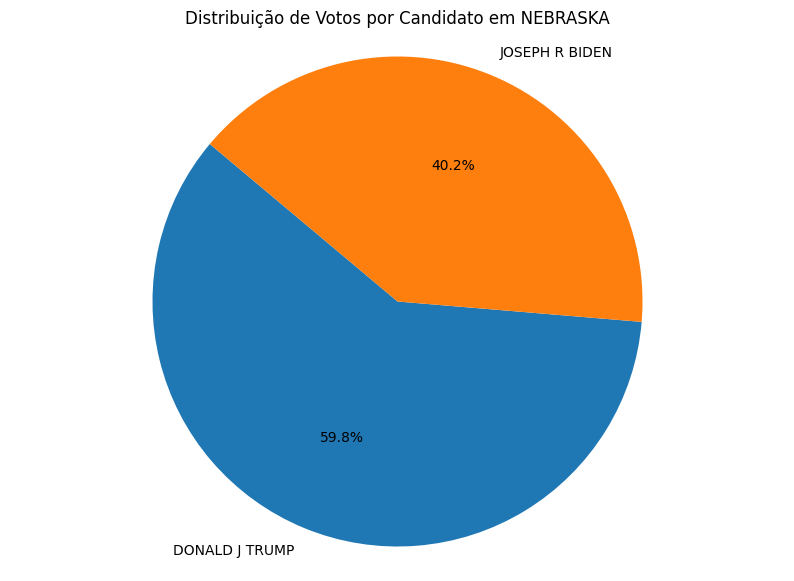

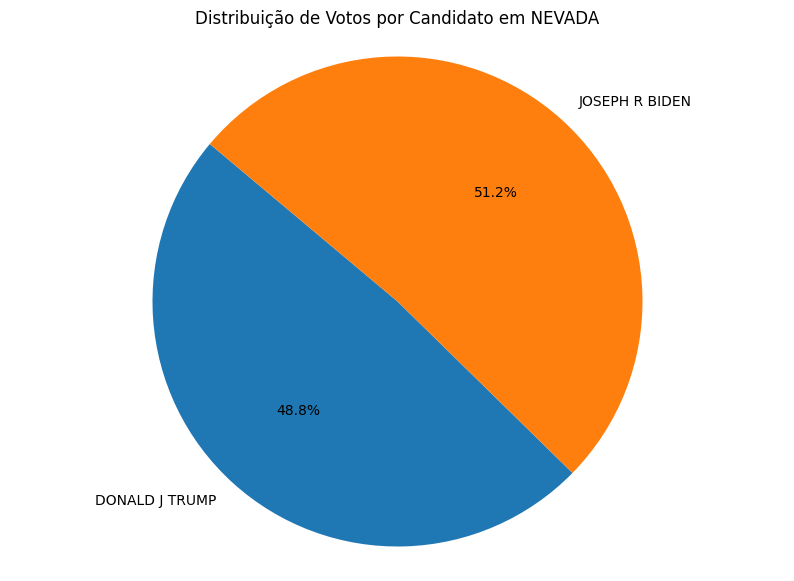

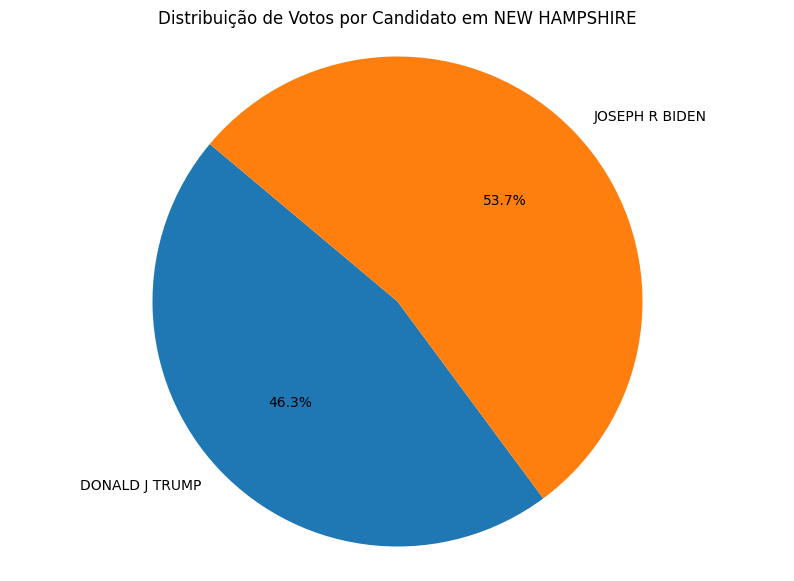

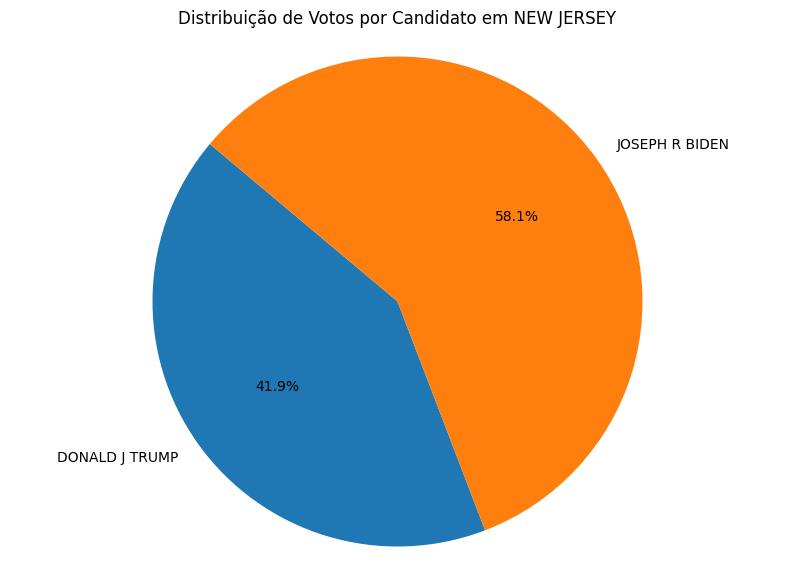

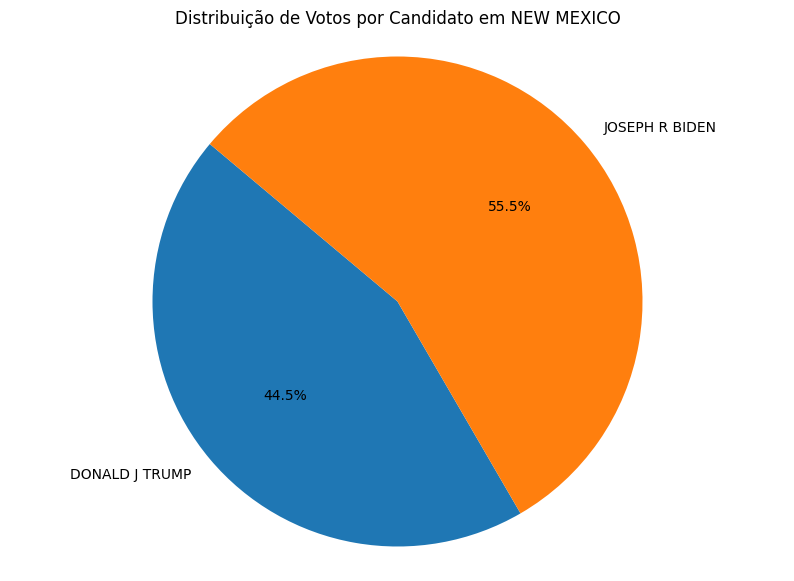

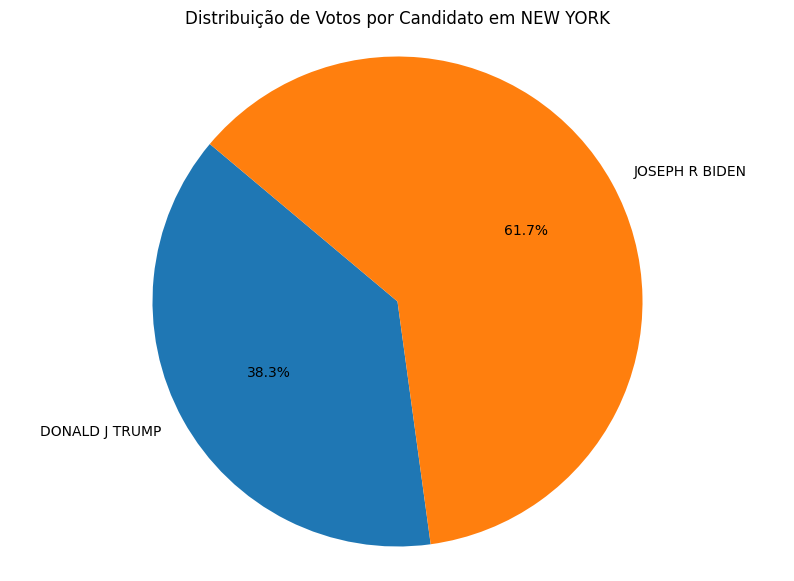

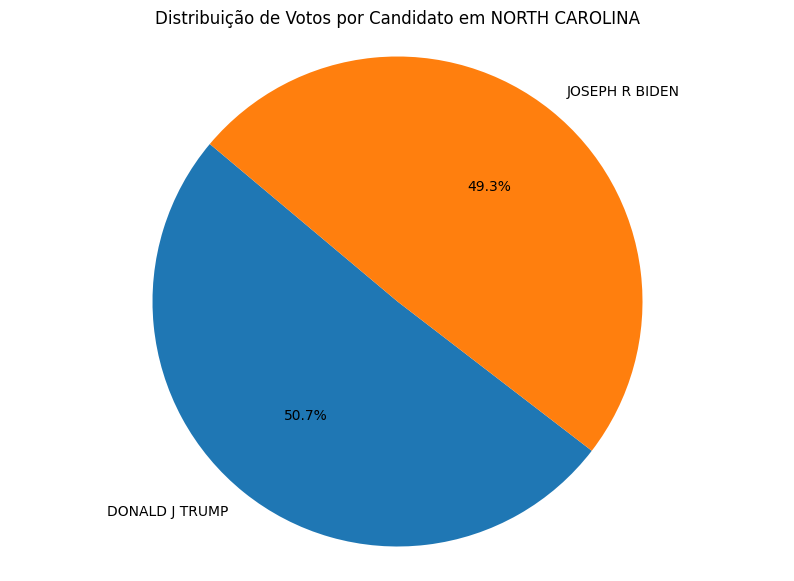

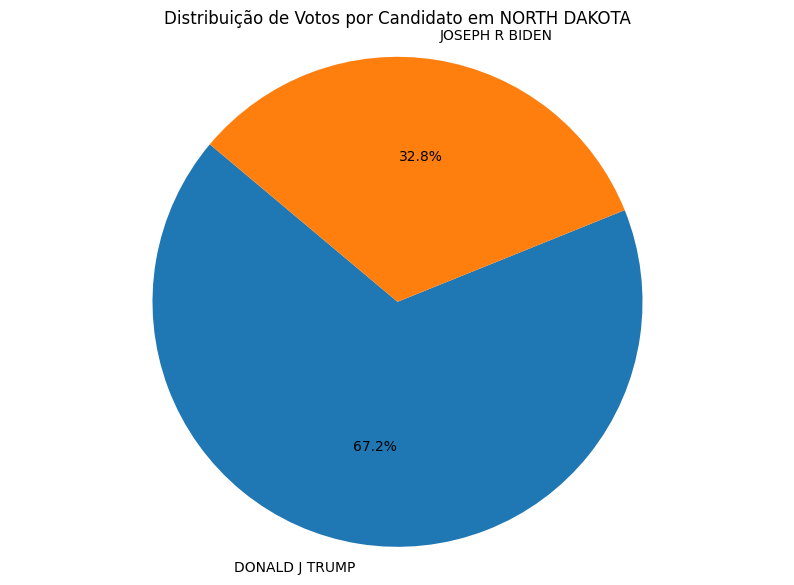

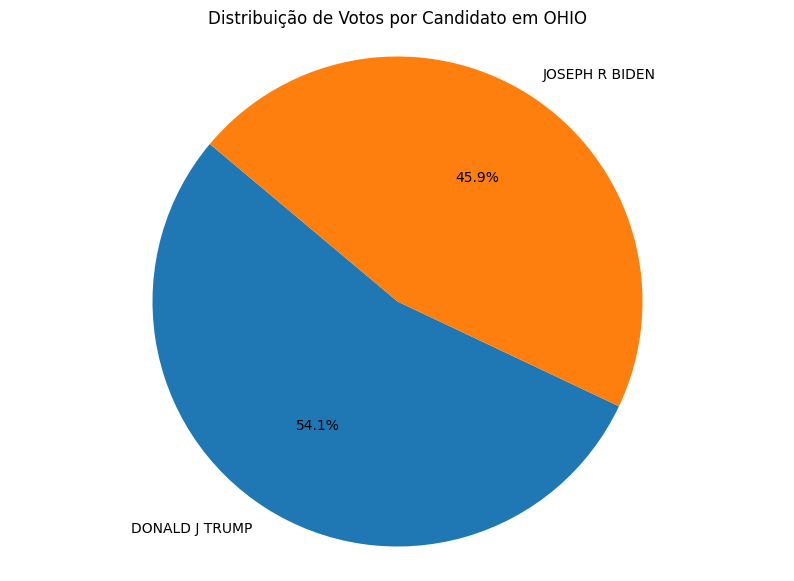

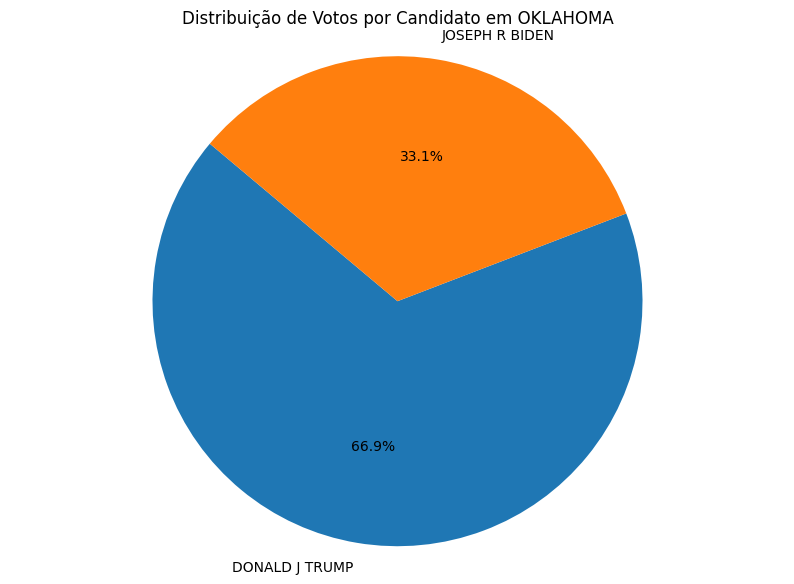

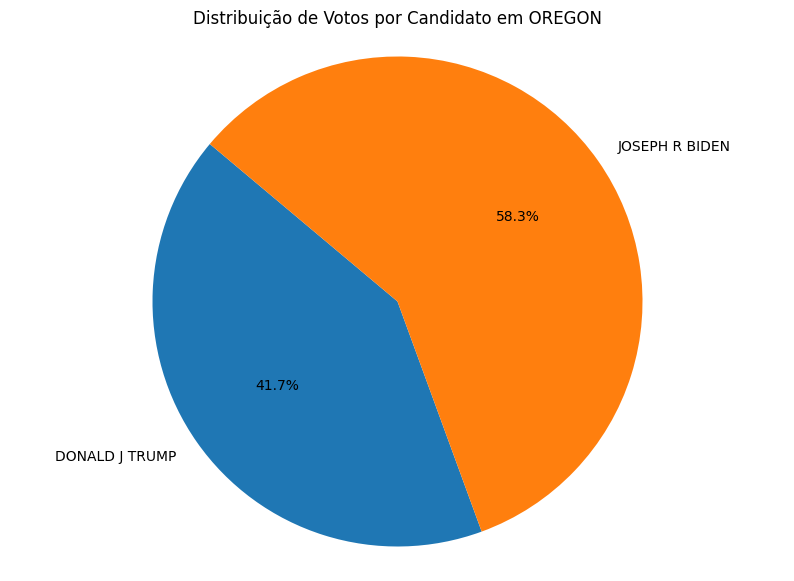

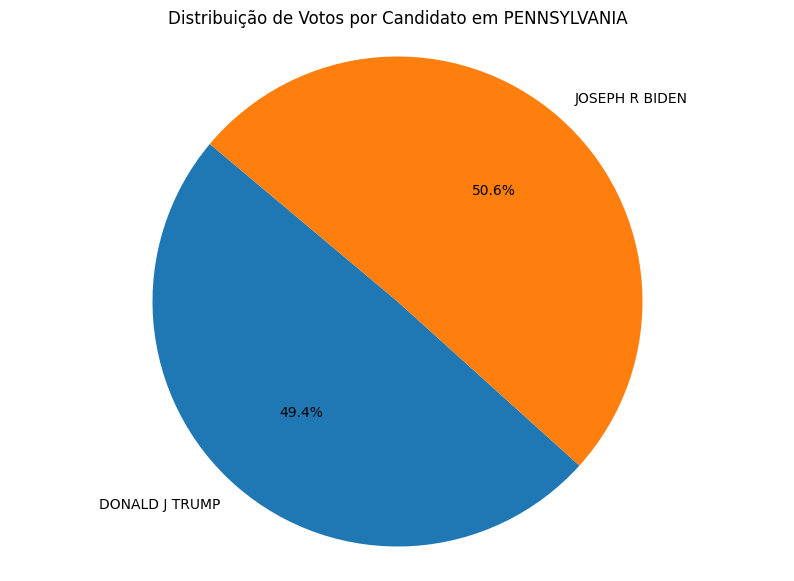

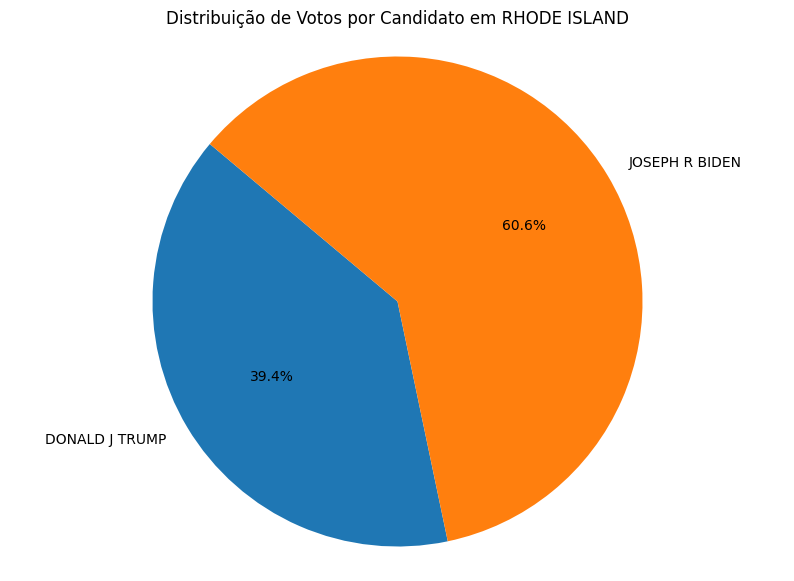

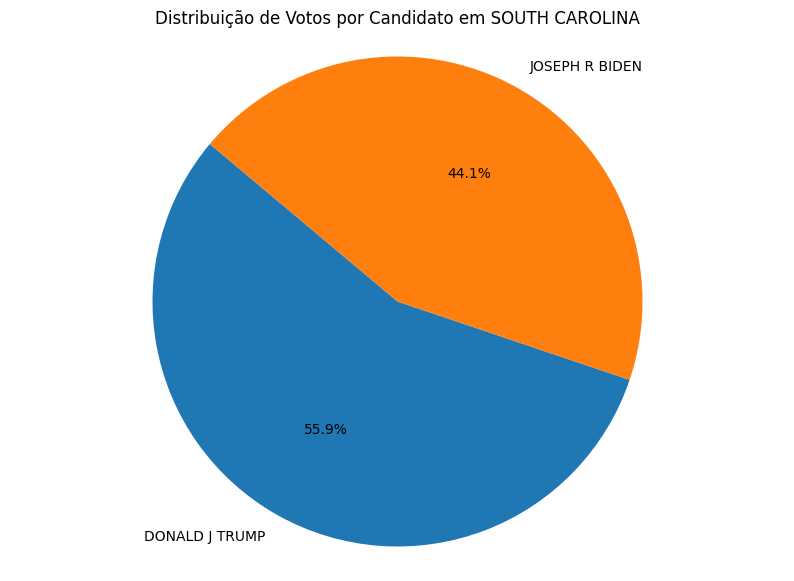

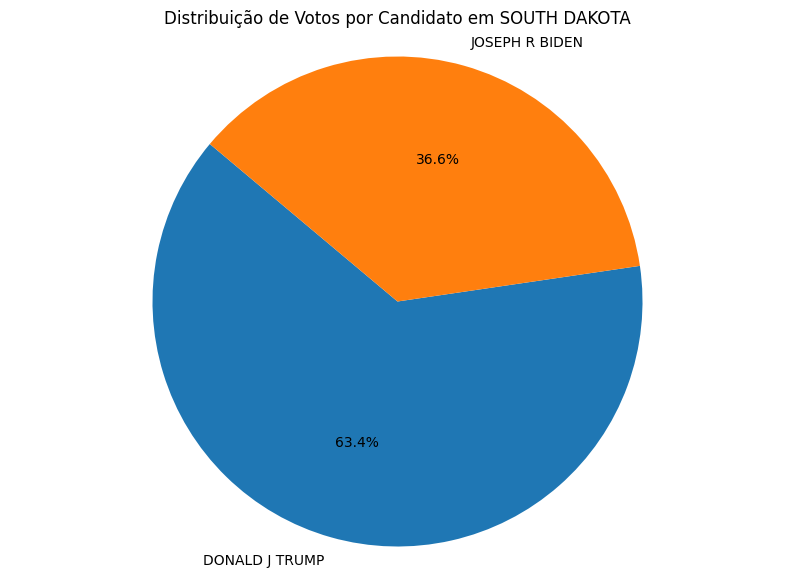

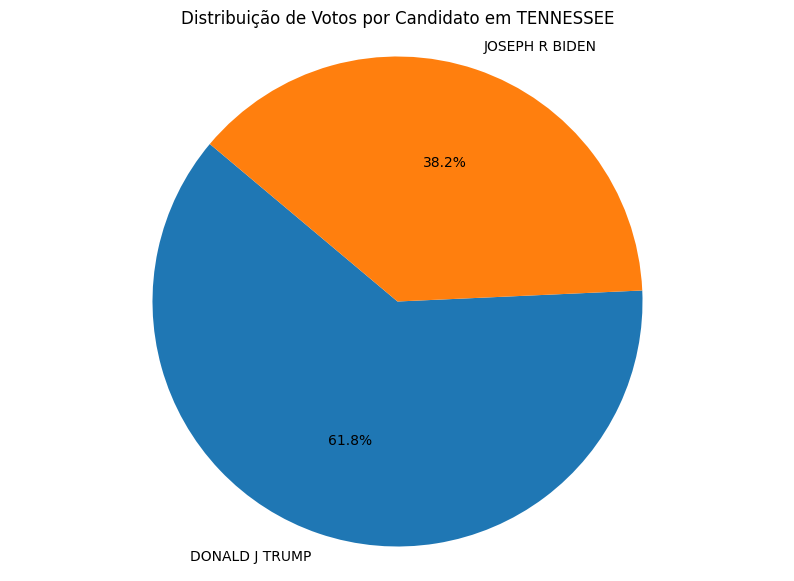

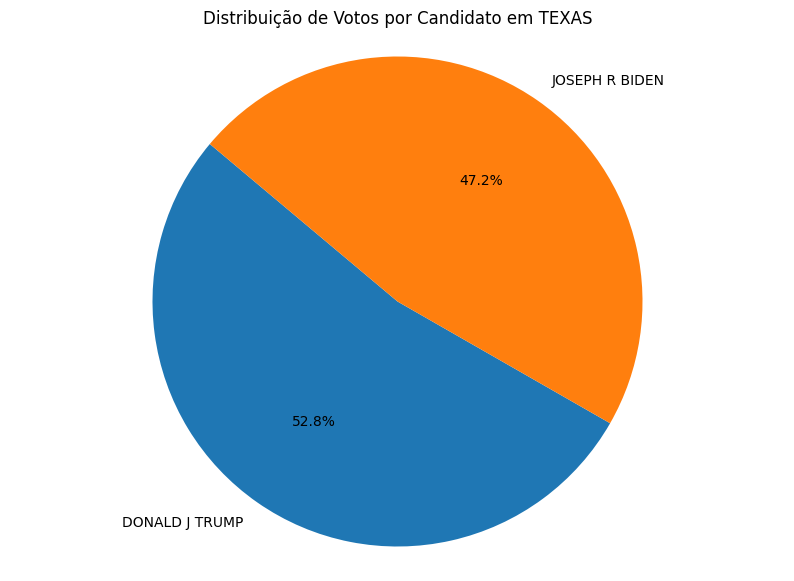

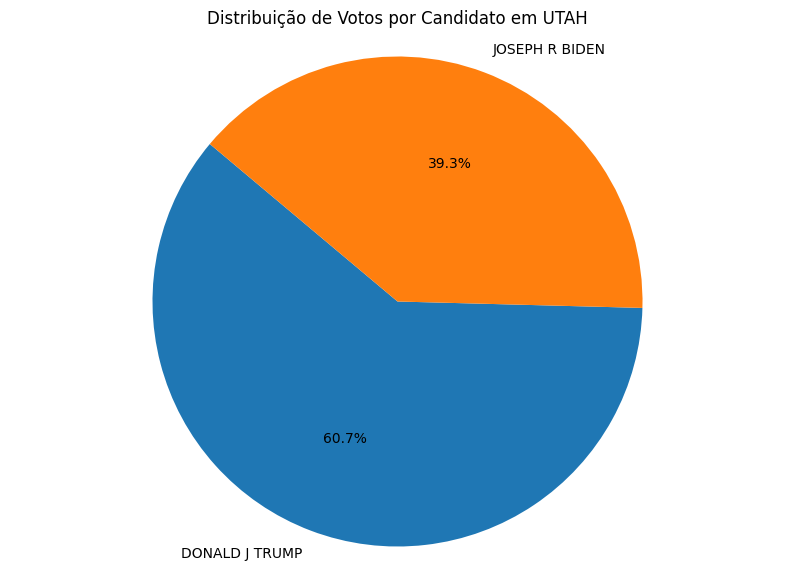

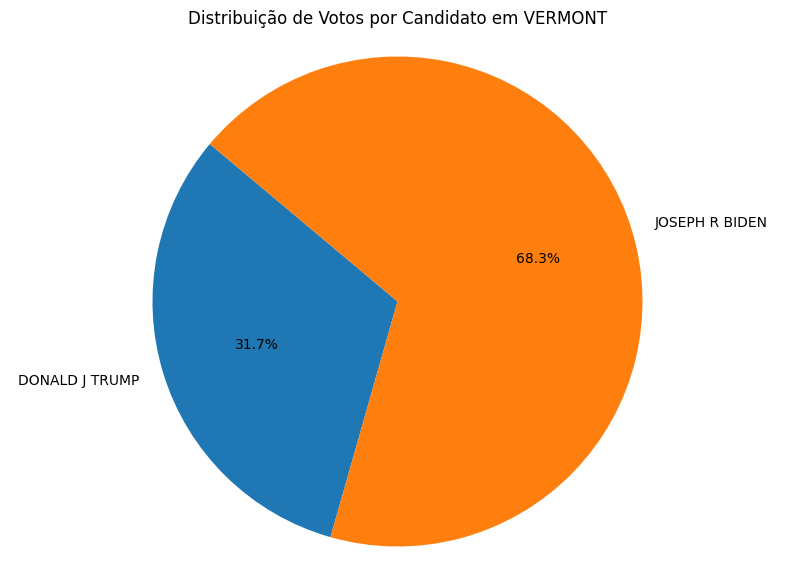

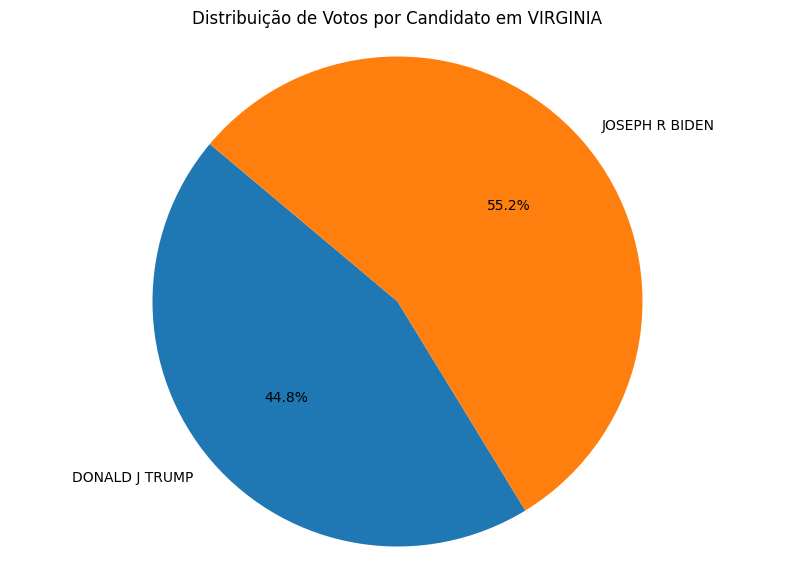

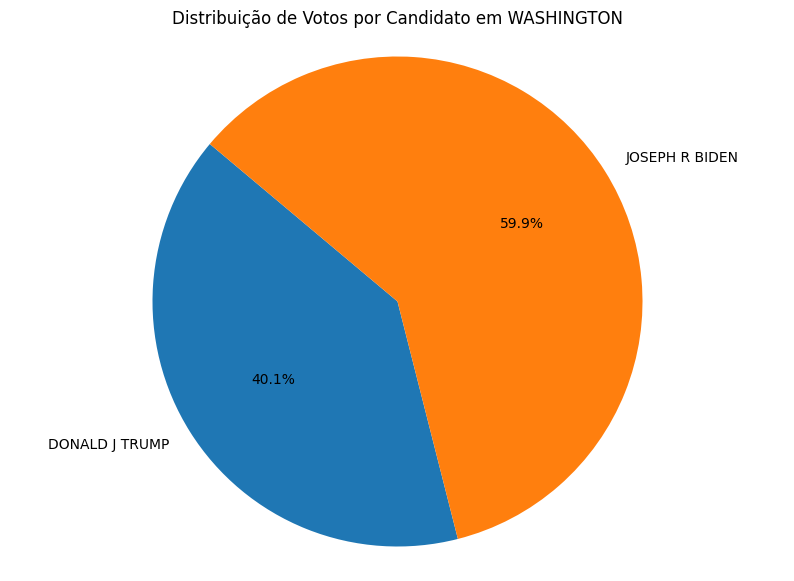

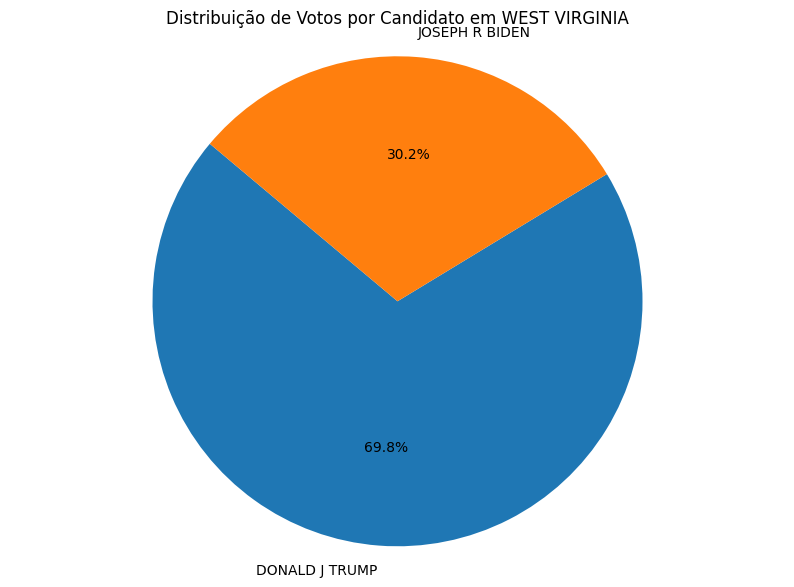

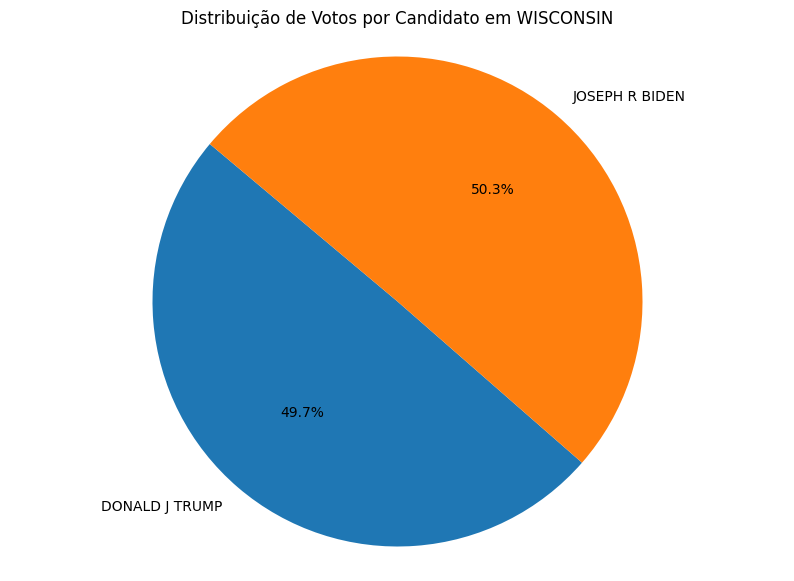

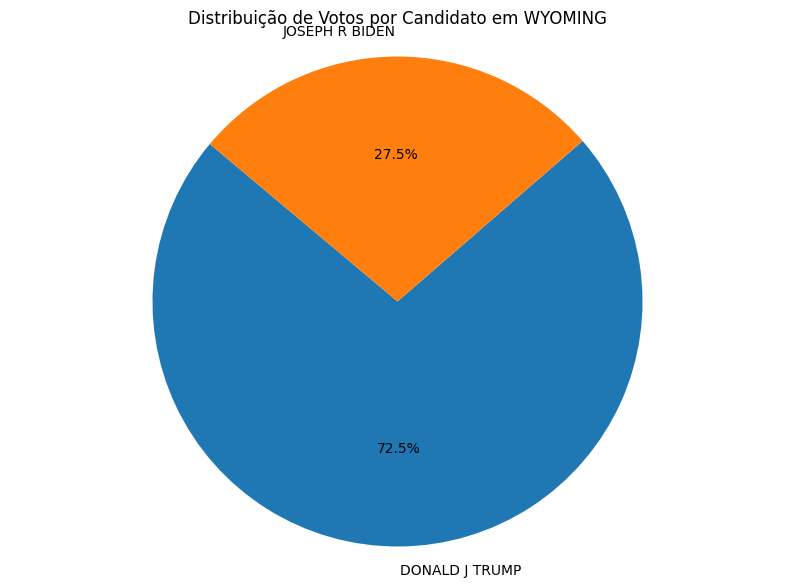

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('votes_trump_biden.csv')


votes_by_state_and_candidate = df.groupby(['state', 'candidate'])['votes'].sum().reset_index()


votes_by_state_and_candidate = votes_by_state_and_candidate[votes_by_state_and_candidate['votes'] > 1]


states = votes_by_state_and_candidate['state'].unique()

for state in states:
    state_data = votes_by_state_and_candidate[votes_by_state_and_candidate['state'] == state]
    if not state_data.empty:
        plt.figure(figsize=(10, 7))
        plt.pie(state_data['votes'], labels=state_data['candidate'], autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribuição de Votos por Candidato em {state}')
        plt.axis('equal')  
        plt.show()


In [2]:
import pandas as pd

# Carregar o dataset
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/JXPREB
file_path = 'PRESIDENT_precinct_general.csv' 
df = pd.read_csv(file_path)


states = ['new york', 'michigan', 'illinois', 'california', 'DISTRICT OF COLUMBIA']

for state in states:
    state_df = df[df['state'].str.lower() == state.lower()]  
    output_file = f'votes_{state.replace(" ", "_").lower()}.csv'  
    state_df.to_csv(output_file, index=False) 




C:\Users\Raissa\AppData\Local\Temp\ipykernel_8196\3190814707.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Arquivos CSV separados por estado foram criados com sucesso.


In [ ]:
import pandas as pd
import folium

file_path = 'Detroit.csv'  
df = pd.read_csv(file_path)

center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()


m = folium.Map(location=[center_lat, center_lon], zoom_start=10)


for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Line: {row['line_number']}").add_to(m)


m.save('map.html')

m



Detroit data

In [1]:

import pandas as pd


file_path = 'votes_michigan.csv'  
df = pd.read_csv(file_path)


df_detroit = df[df['jurisdiction_name'].str.lower() == 'detroit city']


output_file_path = 'votes_detroit.csv'
df_detroit.to_csv(output_file_path, index=False)





Arquivo votes_detroit.csv criado com sucesso.


Sao francisco

In [1]:

import pandas as pd

file_path = 'votes_california.csv'  
df = pd.read_csv(file_path)


df_detroit = df[df['jurisdiction_name'].str.lower() == 'san francisco']


output_file_path = 'votes_san_francisco.csv'
df_detroit.to_csv(output_file_path, index=False)



Arquivo votes_san_francisco.csv criado com sucesso.


chicago -> COOK ILLINOIS

In [1]:

import pandas as pd

file_path = 'votes_illinois.csv'  
df = pd.read_csv(file_path)


df_cook = df[df['county_name'].str.lower() == 'cook']


output_file_path = 'votes_cook_chicago.csv'
df_cook.to_csv(output_file_path, index=False)

Separa somente votos para biden e trump

In [6]:
import pandas as pd

df = pd.read_csv('PRESIDENT_precinct_general.csv')


df_filtered = df[df['candidate'].isin(['JOSEPH R BIDEN', 'DONALD J TRUMP'])]

df_filtered.to_csv('votes_trump_biden.csv', index=False)



C:\Users\Raissa\AppData\Local\Temp\ipykernel_16096\553126024.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PRESIDENT_precinct_general.csv')


Arquivo 'votes_trump_biden.csv' criado com sucesso.


Agrupa precincts 
Campos: 'precinct', 'jurisdiction_name', 'county_name', 'state', 'trump', 'biden'

In [2]:
import pandas as pd


df = pd.read_csv('votes_trump_biden.csv')

df_filtered = df[df['candidate'].isin(['JOSEPH R BIDEN', 'DONALD J TRUMP'])]

pivot_table = df_filtered.pivot_table(
    index=['precinct', 'jurisdiction_name', 'county_name', 'state'],
    columns='candidate',
    values='votes',
    aggfunc='sum',
    fill_value=0
).reset_index()


pivot_table.columns.name = None
pivot_table = pivot_table.rename(columns={
    'JOSEPH R BIDEN': 'biden',
    'DONALD J TRUMP': 'trump'
})

final_df = pivot_table[['precinct', 'jurisdiction_name', 'county_name', 'state', 'trump', 'biden']]

final_df.to_csv('votes_trump_biden_grouped.csv', index=False)



Separa para os estados do City_Street_View_Dataset

In [3]:
import pandas as pd

file_path = 'votes_trump_biden_grouped.csv' 
df = pd.read_csv(file_path)

"""
    New York City - New York
    Washington - District of Columbia
    Chicago - Illinois
    San Francisco - California
    Detroit - Michigan
"""

states = ['new york', 'michigan', 'illinois', 'california', 'DISTRICT OF COLUMBIA']

for state in states:
    state_df = df[df['state'].str.lower() == state.lower()]  
    output_file = f'votes_{state.replace(" ", "_").lower()}_trump_biden_grouped.csv'  
    state_df.to_csv(output_file, index=False) 


Chicago -> Distrito de COOK Illinois

In [4]:
import pandas as pd

file_path = 'votes_illinois_trump_biden_grouped.csv'  
df = pd.read_csv(file_path)


df_cook = df[df['county_name'].str.lower() == 'cook']


output_file_path = 'votes_cook_chicago_trump_biden_grouped.csv'
df_cook.to_csv(output_file_path, index=False)

CHICAGO WARD/PRECINCT DELIMITAÇÕES

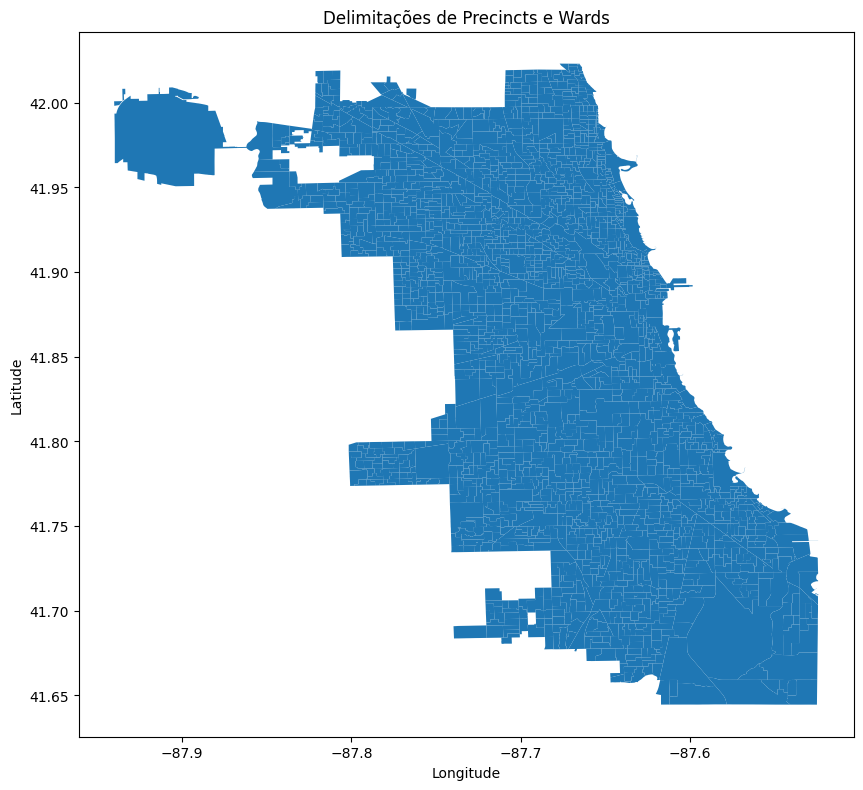

In [5]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_csv('PRECINCTS_2012_20240603.csv')


df['geometry'] = df['the_geom'].apply(wkt.loads)


gdf = gpd.GeoDataFrame(df, geometry='geometry')

plt.figure(figsize=(10, 10))
gdf.plot(ax=plt.gca())
plt.title('Delimitações de Precincts e Wards')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


SORT FOTOS DE CHICAGO POR WARD/PRECINCT

In [6]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

df_polygons = pd.read_csv('PRECINCTS_2012_20240603.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)


gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_points = pd.read_csv('Chicago.csv')


df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')


gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


final_df = gdf_points[['latitude', 'longitude', 'line_number', 'WARD', 'PRECINCT']]


final_df.to_csv('Chicago_ward_precinct.csv', index=False)



C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


QUANTIDADE DE FOTOS CITY_STREET_VIEW_DATASET POR WARD/PRECINCT (CHICAGO)

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Figure size 1000x1000 with 0 Axes>

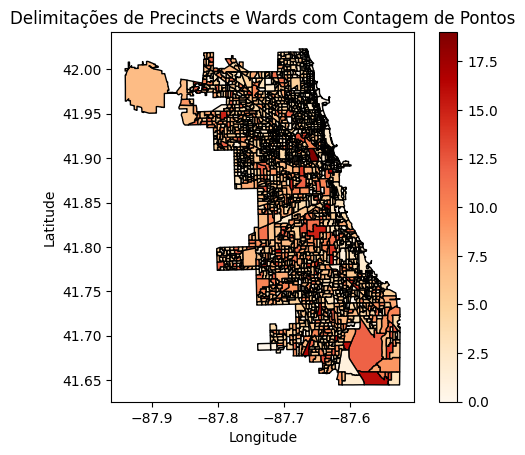

In [7]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_polygons = pd.read_csv('PRECINCTS_2012_20240603.csv')

df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_points = pd.read_csv('Chicago.csv')

df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')

gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points_with_polygons = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


polygon_counts = gdf_points_with_polygons.groupby('index_right').size()


gdf_polygons['point_count'] = polygon_counts

gdf_polygons['point_count'] = gdf_polygons['point_count'].fillna(0)


plt.figure(figsize=(10, 10))
gdf_polygons.plot(column='point_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Delimitações de Precincts e Wards com Contagem de Pontos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


PROPORÇÃO DE VOTOS BIDEN/TRUMP CHICAGO

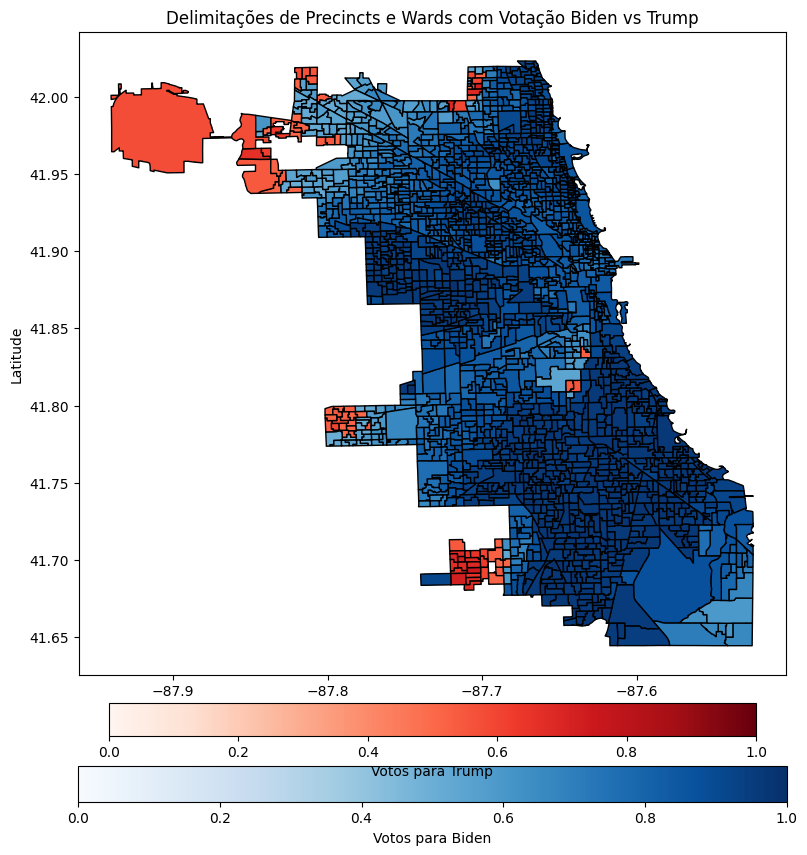

In [13]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

df_polygons = pd.read_csv('PRECINCTS_2012_20240603.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_votes = pd.read_csv('votes_cook_chicago_trump_biden_grouped.csv')

valid_precincts = df_votes['precinct'].str.match(r'WARD \d+ PRECINCT \d+')


df_votes_valid = df_votes[valid_precincts].copy()

df_votes_valid[['ward', 'precinct']] = df_votes_valid['precinct'].str.extract(r'WARD (\d+) PRECINCT (\d+)')

df_votes_valid['ward'] = df_votes_valid['ward'].astype(int)
df_votes_valid['precinct'] = df_votes_valid['precinct'].astype(int)

gdf_polygons[['ward', 'precinct']] = gdf_polygons[['WARD', 'PRECINCT']].astype(int)


gdf_merged = gdf_polygons.merge(df_votes_valid, on=['ward', 'precinct'], how='inner')

def determine_color(row):
    total_votes = row['biden'] + row['trump']
    if total_votes == 0:
        return (0, 0, 0, 0)  
    if row['biden'] > row['trump']:
        return plt.cm.Blues(row['biden'] / total_votes)
    else:
        return plt.cm.Reds(row['trump'] / total_votes)

gdf_merged['color'] = gdf_merged.apply(determine_color, axis=1)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='black')

norm = Normalize(vmin=0, vmax=1)
sm_biden = ScalarMappable(cmap='Blues', norm=norm)
sm_biden.set_array([])
sm_trump = ScalarMappable(cmap='Reds', norm=norm)
sm_trump.set_array([])


cbar_biden = fig.colorbar(sm_biden, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_biden.set_label('Votos para Biden')
cbar_trump = fig.colorbar(sm_trump, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_trump.set_label('Votos para Trump')

plt.title('Delimitações de Precincts e Wards com Votação Biden vs Trump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

San Francisco -> California

In [1]:
import pandas as pd

file_path = 'votes_california_trump_biden_grouped.csv'  
df = pd.read_csv(file_path)


df_san_francisco = df[df['county_name'].str.lower() == 'san francisco']


output_file_path = 'votes_san_francisco_trump_biden_grouped.csv'
df_san_francisco.to_csv(output_file_path, index=False)

San Francisco PRECINCT DELIMITAÇÕES

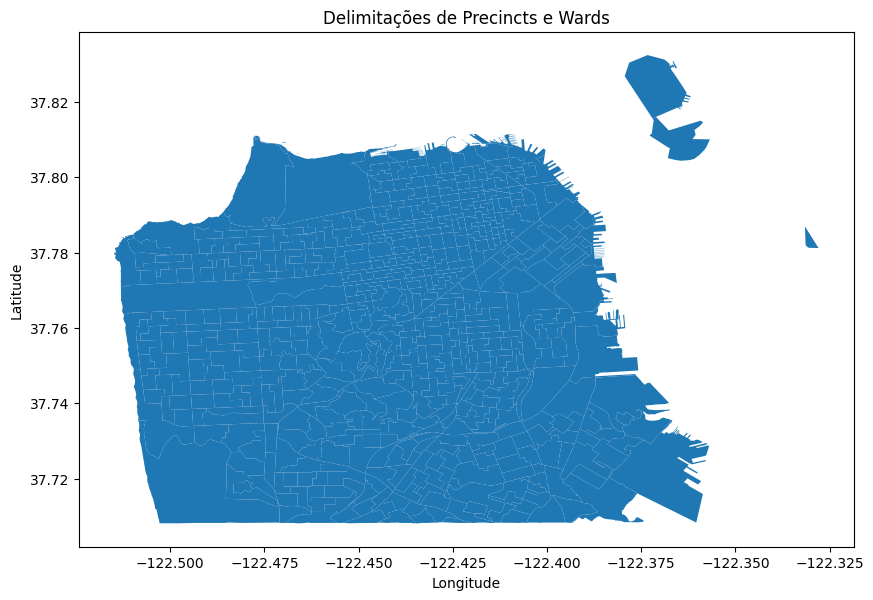

In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_csv('Election_Precincts_-_Historical__Defined_2012_20240603.csv')


df['geometry'] = df['the_geom'].apply(wkt.loads)


gdf = gpd.GeoDataFrame(df, geometry='geometry')

plt.figure(figsize=(10, 10))
gdf.plot(ax=plt.gca())
plt.title('Delimitações de Precincts e Wards')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


SORT FOTOS DE SAN FRANCISCO POR WARD/PRECINCT

In [3]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

df_polygons = pd.read_csv('Election_Precincts_-_Historical__Defined_2012_20240603.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)


gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_points = pd.read_csv('San Francisco.csv')


df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')


gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


final_df = gdf_points[['latitude', 'longitude', 'line_number', 'prec_2012']]


final_df.to_csv('San_Francisco_ward_precinct.csv', index=False)


C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


QUANTIDADE DE FOTOS CITY_STREET_VIEW_DATASET POR PRECINCT (SAN FRANCISCO)

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Figure size 1000x1000 with 0 Axes>

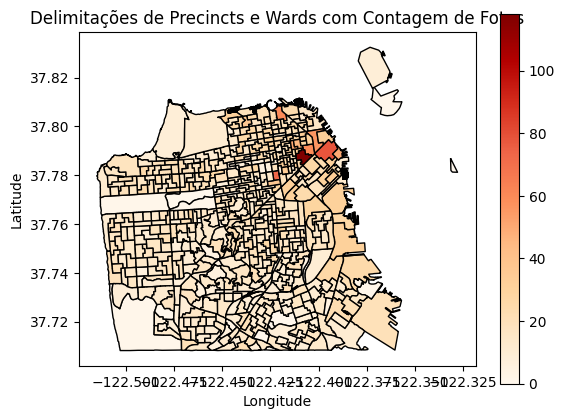

In [4]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_polygons = pd.read_csv('Election_Precincts_-_Historical__Defined_2012_20240603.csv')

df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_points = pd.read_csv('San Francisco.csv')

df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')

gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points_with_polygons = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


polygon_counts = gdf_points_with_polygons.groupby('index_right').size()


gdf_polygons['point_count'] = polygon_counts

gdf_polygons['point_count'] = gdf_polygons['point_count'].fillna(0)


plt.figure(figsize=(10, 10))
gdf_polygons.plot(column='point_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Delimitações de Precincts e Wards com Contagem de Fotos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


PROPORÇÃO DE VOTOS BIDEN/TRUMP SAN FRANCISCO

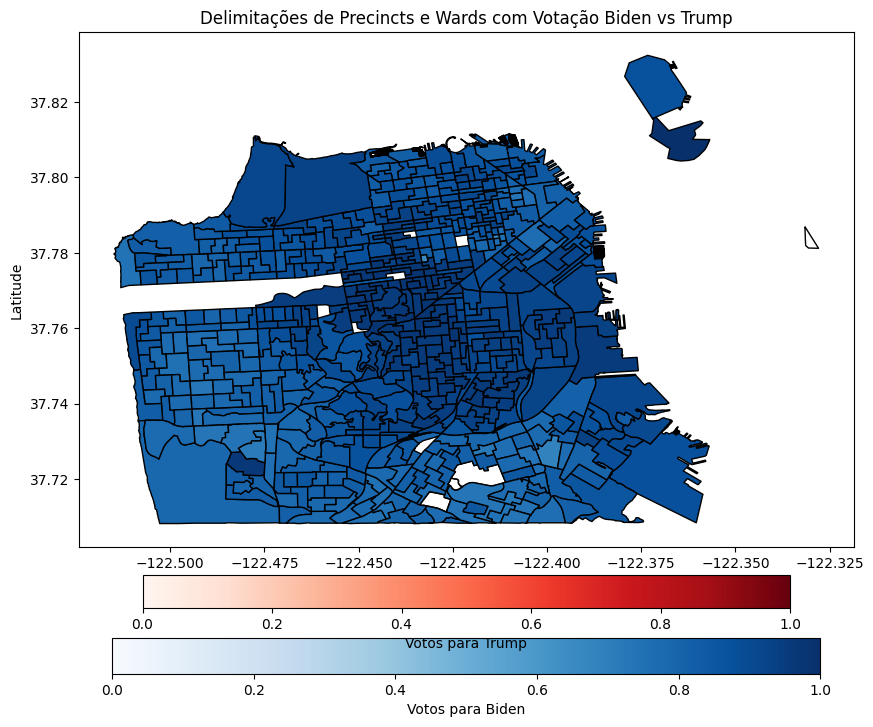

In [12]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

df_polygons = pd.read_csv('Election_Precincts_-_Historical__Defined_2012_20240603.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_votes = pd.read_csv('votes_san_francisco_trump_biden_grouped.csv')


df_votes['prec_2012'] = df_votes['precinct'].str[5:9]


df_votes_valid = df_votes.dropna(subset=['prec_2012'])

# print(df_votes_valid['prec_2012'])
df_votes_valid['prec_2012'] = df_votes_valid['prec_2012'].astype(float).fillna(0).astype(int)

gdf_polygons['prec_2012'] = gdf_polygons['prec_2012'].astype(float).fillna(0).astype(int)

gdf_merged = gdf_polygons.merge(df_votes_valid, on='prec_2012', how='inner')


def determine_color(row):
    total_votes = row['biden'] + row['trump']
    if total_votes == 0:
        return (0, 0, 0, 0)  
    ratio = row['biden'] / total_votes if row['biden'] > row['trump'] else row['trump'] / total_votes
    return plt.cm.Blues(ratio) if row['biden'] > row['trump'] else plt.cm.Reds(ratio)

gdf_merged['color'] = gdf_merged.apply(determine_color, axis=1)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='black')


norm = Normalize(vmin=0, vmax=1)
sm_biden = ScalarMappable(cmap='Blues', norm=norm)
sm_biden.set_array([])
sm_trump = ScalarMappable(cmap='Reds', norm=norm)
sm_trump.set_array([])


cbar_biden = fig.colorbar(sm_biden, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_biden.set_label('Votos para Biden')
cbar_trump = fig.colorbar(sm_trump, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_trump.set_label('Votos para Trump')

plt.title('Delimitações de Precincts e Wards com Votação Biden vs Trump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


DETROIT CITY - MICHIGAN

In [13]:
import pandas as pd

file_path = 'votes_michigan_trump_biden_grouped.csv'  
df = pd.read_csv(file_path)


df_san_francisco = df[df['jurisdiction_name'].str.lower() == 'detroit city']


output_file_path = 'votes_detroit_city_trump_biden_grouped.csv'
df_san_francisco.to_csv(output_file_path, index=False)

GEOJSON converter WASHINGTON DC

In [23]:
import geojson
import csv

def convert_geojson_to_csv(geojson_file, csv_file):

    with open(geojson_file, 'r') as f:
        data = geojson.load(f)
    
    with open(csv_file, 'w', newline='') as csvfile:
        fieldnames = ['precinct', 'gisid', 'the_geom']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        
        for feature in data['features']:
            precinct_name = feature['properties'].get('NAME', '')
            gis_id = feature['properties'].get('GIS_ID', '')
            
            coordinates = feature['geometry']['coordinates']
            if feature['geometry']['type'] == 'Polygon':
                multipolygon_coords = f"MULTIPOLYGON((({', '.join([f'{x[0]} {x[1]}' for x in coordinates[0]])})))"
            elif feature['geometry']['type'] == 'MultiPolygon':
                multipolygon_coords = f"MULTIPOLYGON({', '.join([f'(({', '.join([f'{x[0]} {x[1]}' for x in polygon[0]])}))' for polygon in coordinates])})"
            else:
                raise ValueError('Unsupported geometry type')
            
            writer.writerow({'precinct': precinct_name, 'gisid': gis_id, 'the_geom': multipolygon_coords})


convert_geojson_to_csv('Voting_Precinct_2019.geojson', 'washington_dc_precincts.csv')


washington dc PRECINCT DELIMITAÇÕES

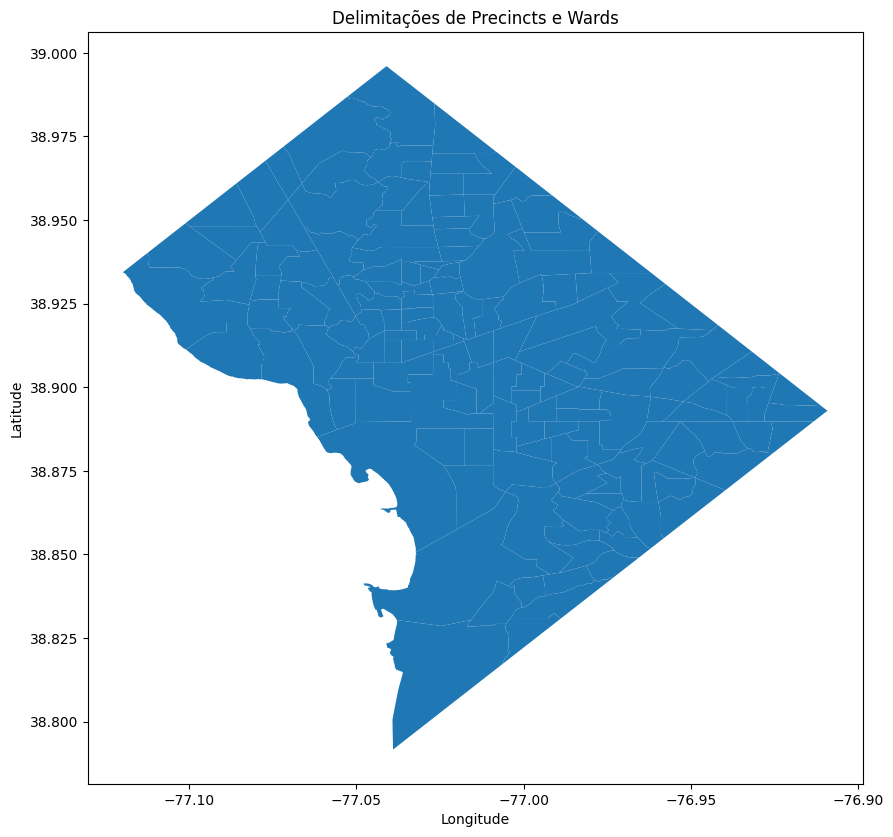

In [25]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_csv('washington_dc_precincts.csv')


df['geometry'] = df['the_geom'].apply(wkt.loads)


gdf = gpd.GeoDataFrame(df, geometry='geometry')

plt.figure(figsize=(10, 10))
gdf.plot(ax=plt.gca())
plt.title('Delimitações de Precincts e Wards')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

SORT FOTOS DE WASHINGTON POR WARD/PRECINCT

In [26]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

df_polygons = pd.read_csv('washington_dc_precincts.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)


gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_points = pd.read_csv('Washington.csv')


df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')


gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


final_df = gdf_points[['latitude', 'longitude', 'line_number', 'precinct']]


final_df.to_csv('Washington_ward_precinct.csv', index=False)

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


QUANTIDADE DE FOTOS CITY_STREET_VIEW_DATASET POR PRECINCT WASHINGTON DC

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Figure size 1000x1000 with 0 Axes>

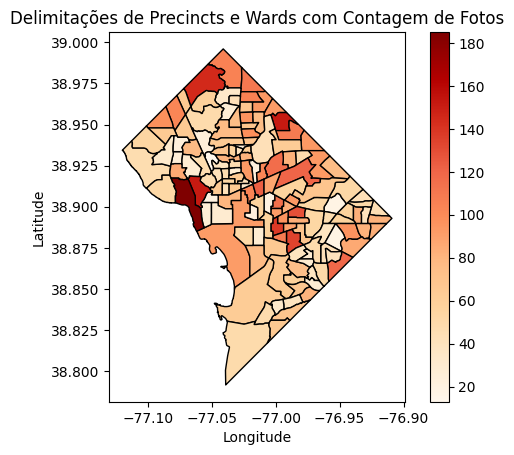

In [27]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_polygons = pd.read_csv('washington_dc_precincts.csv')

df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_points = pd.read_csv('Washington.csv')

df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')

gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points_with_polygons = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


polygon_counts = gdf_points_with_polygons.groupby('index_right').size()


gdf_polygons['point_count'] = polygon_counts

gdf_polygons['point_count'] = gdf_polygons['point_count'].fillna(0)


plt.figure(figsize=(10, 10))
gdf_polygons.plot(column='point_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Delimitações de Precincts e Wards com Contagem de Fotos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

PROPORÇÃO DE VOTOS BIDEN/TRUMP washington dc

<class 'str'>


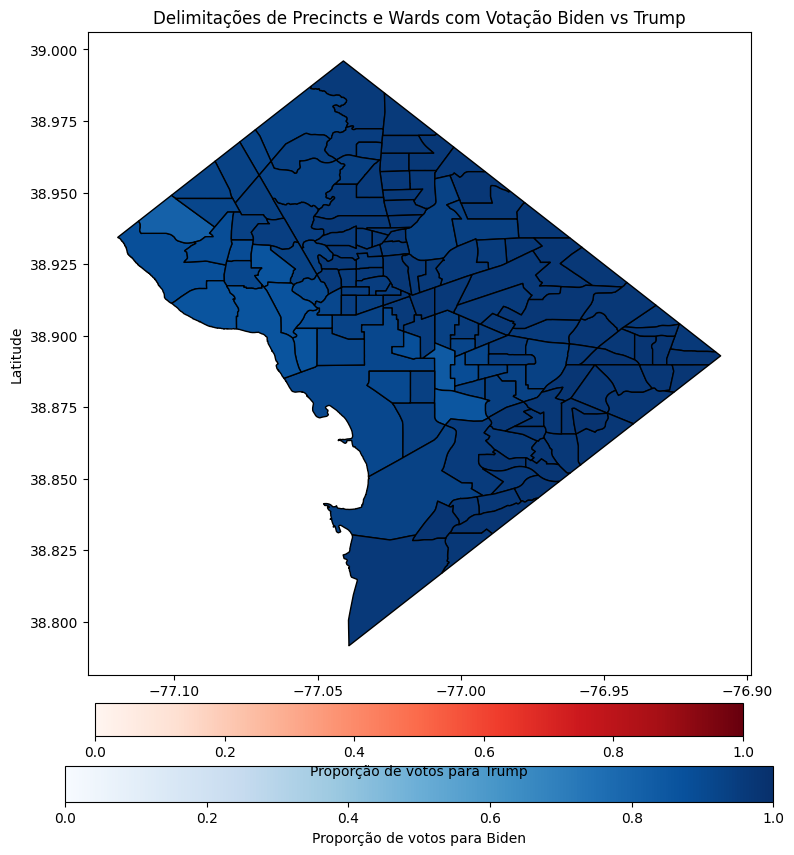

In [40]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


df_polygons = pd.read_csv('washington_dc_precincts.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)



df_polygons['precinct'] = df_polygons['precinct'].str.extract(r'(\d+)')[0] #.str.zfill(3)
# print(df_polygons['precinct'])
# print(type(df_polygons['precinct'][0]))

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_votes = pd.read_csv('votes_district_of_columbia_trump_biden_grouped.csv')

#df_votes['precinct'] = df_votes['precinct'].str[:3]
df_votes['precinct'] = df_votes['precinct'].astype(str)
print(type(df_votes['precinct'][0]))
gdf_merged = gdf_polygons.merge(df_votes, on='precinct', how='inner')


def determine_color(row):
    total_votes = row['biden'] + row['trump']
    if total_votes == 0:
        return (0, 0, 0, 0)  
    ratio = row['biden'] / total_votes if row['biden'] > row['trump'] else row['trump'] / total_votes
    return plt.cm.Blues(ratio) if row['biden'] > row['trump'] else plt.cm.Reds(ratio)

gdf_merged['color'] = gdf_merged.apply(determine_color, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='black')

norm = Normalize(vmin=0, vmax=1)
sm_biden = ScalarMappable(cmap='Blues', norm=norm)
sm_biden.set_array([])
sm_trump = ScalarMappable(cmap='Reds', norm=norm)
sm_trump.set_array([])


cbar_biden = fig.colorbar(sm_biden, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_biden.set_label('Proporção de votos para Biden')
cbar_trump = fig.colorbar(sm_trump, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_trump.set_label('Proporção de votos para Trump')

plt.title('Delimitações de Precincts e Wards com Votação Biden vs Trump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


GEOJSON converter DETROIT

In [24]:
import geojson
import csv

def convert_geojson_to_csv(geojson_file, csv_file):

    with open(geojson_file, 'r') as f:
        data = geojson.load(f)

    with open(csv_file, 'w', newline='') as csvfile:
        fieldnames = ['precinct', 'id', 'the_geom']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        
        for feature in data['features']:
            precinct = feature['properties'].get('poll_locat', '')
            id_value = feature['properties'].get('id', '')
            

            coordinates = feature['geometry']['coordinates']
            if feature['geometry']['type'] == 'Polygon':
                multipolygon_coords = f"MULTIPOLYGON((({', '.join([f'{x[0]} {x[1]}' for x in coordinates[0]])})))"
            elif feature['geometry']['type'] == 'MultiPolygon':
                multipolygon_coords = f"MULTIPOLYGON({', '.join([f'(({', '.join([f'{x[0]} {x[1]}' for x in polygon[0]])}))' for polygon in coordinates])})"
            else:
                raise ValueError('Unsupported geometry type')
            
            writer.writerow({'precinct': precinct, 'id': id_value, 'the_geom': multipolygon_coords})


convert_geojson_to_csv('Election_Precincts.geojson', 'detroit_precincts.csv')


DETROIT PRECINCT DELIMITAÇÕES

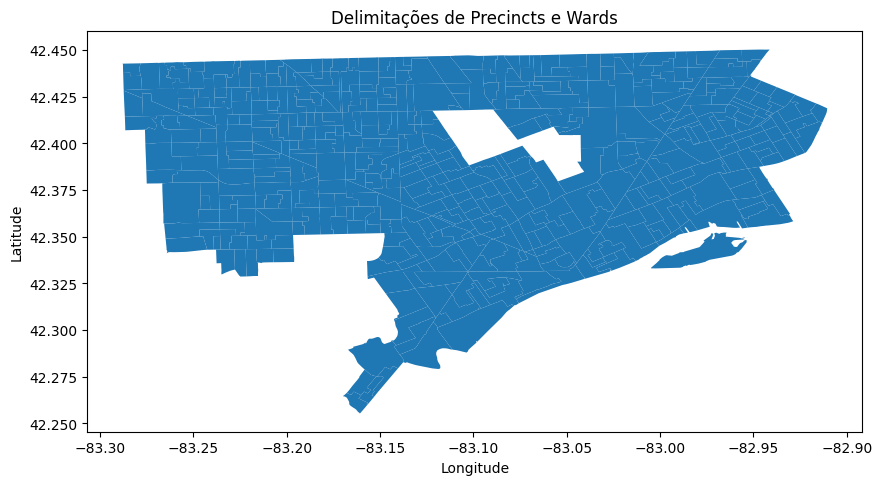

In [41]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_csv('detroit_precincts.csv')


df['geometry'] = df['the_geom'].apply(wkt.loads)


gdf = gpd.GeoDataFrame(df, geometry='geometry')

plt.figure(figsize=(10, 10))
gdf.plot(ax=plt.gca())
plt.title('Delimitações de Precincts e Wards')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

SORT FOTOS DE DETROIT POR WARD/PRECINCT

In [42]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

df_polygons = pd.read_csv('detroit_precincts.csv')


df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)


gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_points = pd.read_csv('Detroit.csv')


df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')


gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


final_df = gdf_points[['latitude', 'longitude', 'line_number', 'precinct']]


final_df.to_csv('Washington_ward_precinct.csv', index=False)

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


QUANTIDADE DE FOTOS CITY_STREET_VIEW_DATASET POR PRECINCT  DETROIT CITY

C:\Users\Raissa\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Figure size 1000x1000 with 0 Axes>

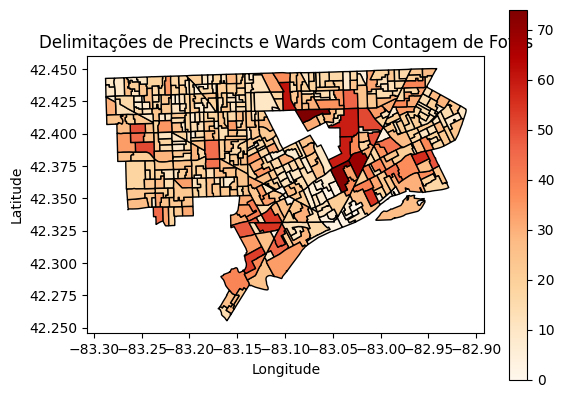

In [43]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_polygons = pd.read_csv('detroit_precincts.csv')

df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')

df_points = pd.read_csv('Detroit.csv')

df_points['geometry'] = df_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf_points = gpd.GeoDataFrame(df_points, geometry='geometry')

gdf_polygons = gdf_polygons.set_crs("EPSG:4326")
gdf_points = gdf_points.set_crs("EPSG:4326")


gdf_points_with_polygons = gpd.sjoin(gdf_points, gdf_polygons, how="left", op="within")


polygon_counts = gdf_points_with_polygons.groupby('index_right').size()


gdf_polygons['point_count'] = polygon_counts

gdf_polygons['point_count'] = gdf_polygons['point_count'].fillna(0)


plt.figure(figsize=(10, 10))
gdf_polygons.plot(column='point_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Delimitações de Precincts e Wards com Contagem de Fotos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


PROPORÇÃO DE VOTOS BIDEN/TRUMP DETROIT CITY

C:\Users\Raissa\AppData\Local\Temp\ipykernel_18000\1164665470.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_votes_filtered['precinct_number'] = df_votes_filtered['precinct'].str.extract(r'(\d+)')[0]
C:\Users\Raissa\AppData\Local\Temp\ipykernel_18000\1164665470.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_votes_filtered['precinct_number'] = df_votes_filtered['precinct_number'].astype(str)


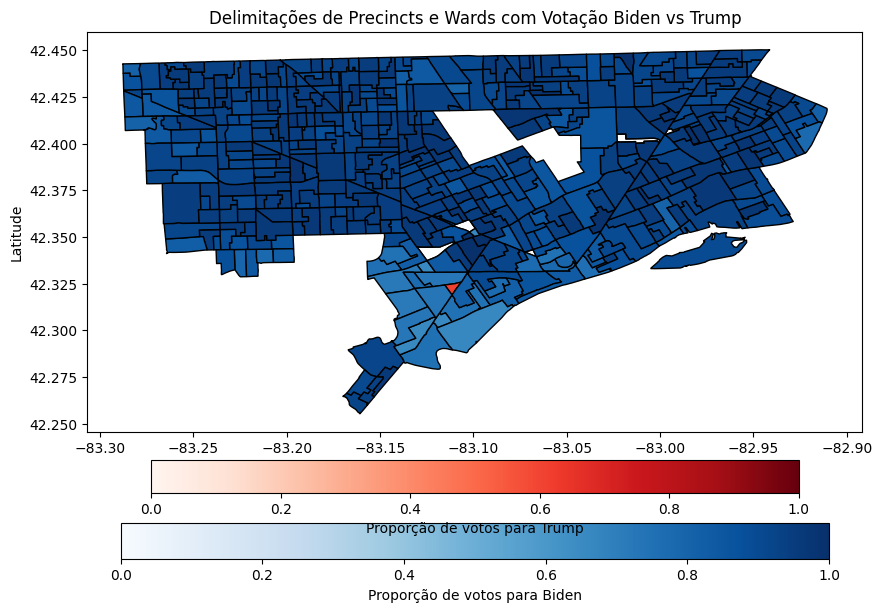

In [44]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


df_polygons = pd.read_csv('detroit_precincts.csv')

df_polygons['geometry'] = df_polygons['the_geom'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry')


df_votes = pd.read_csv('votes_detroit_city_trump_biden_grouped.csv')


df_votes_filtered = df_votes[df_votes['precinct'].str.match(r'^\d+(\s*,\s*WARD\s*\d+)?$', na=False)]


df_votes_filtered['precinct_number'] = df_votes_filtered['precinct'].str.extract(r'(\d+)')[0]


gdf_polygons['precinct'] = gdf_polygons['precinct'].astype(str)


df_votes_filtered['precinct_number'] = df_votes_filtered['precinct_number'].astype(str)


gdf_merged = gdf_polygons.merge(df_votes_filtered, left_on='precinct', right_on='precinct_number', how='inner')


def determine_color(row):
    total_votes = row['biden'] + row['trump']
    if total_votes == 0:
        return (0, 0, 0, 0)  
    ratio = row['biden'] / total_votes if row['biden'] > row['trump'] else row['trump'] / total_votes
    return plt.cm.Blues(ratio) if row['biden'] > row['trump'] else plt.cm.Reds(ratio)

gdf_merged['color'] = gdf_merged.apply(determine_color, axis=1)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='black')


norm = Normalize(vmin=0, vmax=1)
sm_biden = ScalarMappable(cmap='Blues', norm=norm)
sm_biden.set_array([])
sm_trump = ScalarMappable(cmap='Reds', norm=norm)
sm_trump.set_array([])


cbar_biden = fig.colorbar(sm_biden, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_biden.set_label('Proporção de votos para Biden')
cbar_trump = fig.colorbar(sm_trump, ax=ax, fraction=0.046, pad=0.04, orientation='horizontal')
cbar_trump.set_label('Proporção de votos para Trump')

plt.title('Delimitações de Precincts e Wards com Votação Biden vs Trump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
